# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

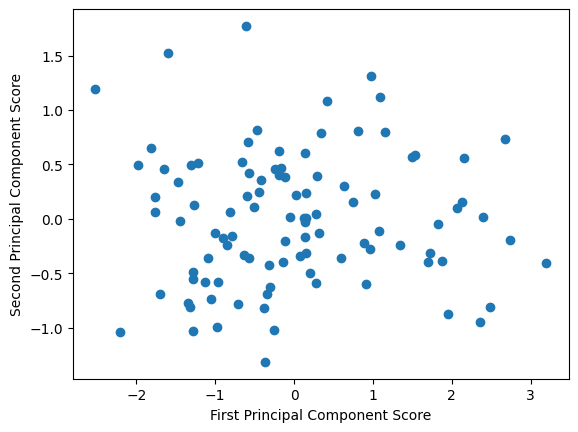

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

The PCA scatter plot reveals three outliers in the upper left corner, characterized by low scores on the first principal component and high scores on the second. This suggests that these points deviate significantly from the main direction of variance (which is largely driven by the strong correlation between series_1 and series_2) and instead show unusual behavior in series_3. Because series_1 and series_2 were generated to be nearly collinear—series_2 being a noisy version of series_1—they dominate the first principal component, making it difficult to distinguish between them in the PCA plot. The second component, being orthogonal to the first, captures variation mostly attributable to series_3, which explains why the outliers stand out in that direction. A pairplot of the three series confirms the tight relationship between series_1 and series_2 and the broader spread of series_3. Overall, the PCA plot is useful for detecting outliers and understanding variance structure, but it has limitations in interpreting individual variable contributions, especially when variables are highly correlated.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

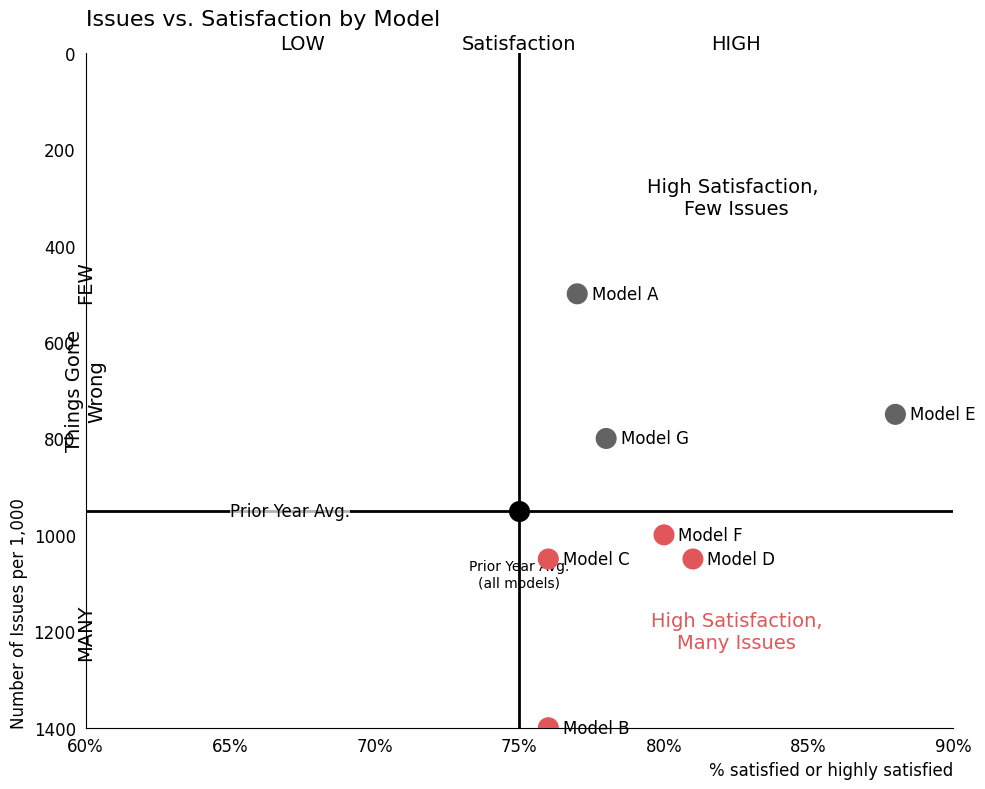

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = {
    'Model': ['Model A', 'Model B', 'Model C', 'Model D', 'Model E', 'Model F', 'Model G'],
    'Satisfaction': [0.77, 0.76, 0.76, 0.81, 0.88, 0.80, 0.78],  # As a percentage (e.g., 77% -> 0.77)
    'Issues': [500, 1400, 1050, 1050, 750, 1000, 800],
    'Color': ['#636363', '#e15759', '#e15759', '#e15759', '#636363', '#e15759', '#636363']
}

df = pd.DataFrame(data)

prior_avg_x = 0.75
prior_avg_y = 950

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(df['Satisfaction'], df['Issues'], color=df['Color'], s=200, zorder=5)

ax.scatter(prior_avg_x, prior_avg_y, color='black', s=200, zorder=5)

ax.axvline(x=prior_avg_x, color='black', linestyle='-', linewidth=2)
ax.axhline(y=prior_avg_y, color='black', linestyle='-', linewidth=2)

ax.invert_yaxis()

ax.set_xlim(0.60, 0.90)
ax.set_ylim(1400, 0)
ax.set_xticks(np.arange(0.60, 0.91, 0.05))
ax.set_xticklabels([f'{int(x*100)}%' for x in np.arange(0.60, 0.91, 0.05)], fontsize=12)
ax.set_yticks(np.arange(0, 1401, 200))
ax.set_yticklabels([f'{int(y)}' for y in np.arange(0, 1401, 200)], fontsize=12)

ax.set_xlabel('% satisfied or highly satisfied', fontsize=12, loc='right')
ax.set_ylabel('Number of Issues per 1,000', fontsize=12, loc='bottom')
ax.set_title('Issues vs. Satisfaction by Model', fontsize=16, loc='left', pad=20)

ax.text(0.675, 0, 'LOW', fontsize=14, ha='center', va='bottom')
ax.text(0.825, 0, 'HIGH', fontsize=14, ha='center', va='bottom')
ax.text(0.825, 300, 'High Satisfaction, \nFew Issues', fontsize=14, color='black', ha='center', va='center')
ax.text(0.825, 1200, 'High Satisfaction,\nMany Issues', fontsize=14, color='#e15759', ha='center', va='center')
ax.text(0.65, 950, 'Prior Year Avg.', fontsize=12, color='black', ha='left', va='center',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='square,pad=0'))

for i in range(len(df)):
    ax.text(df['Satisfaction'][i] + 0.005, df['Issues'][i], df['Model'][i],
            horizontalalignment='left', verticalalignment='center', fontsize=12, color='black')

ax.text(prior_avg_x, prior_avg_y + 100, 'Prior Year Avg.\n(all models)',
        horizontalalignment='center', verticalalignment='top', fontsize=10, color='black')

ax.text(0.60, 475, 'FEW', rotation=90, ha='center', va='center', fontsize=14)
ax.text(0.60, 1200, 'MANY', rotation=90, ha='center', va='center', fontsize=14)
ax.text(0.75, 0, 'Satisfaction', ha='center', va='bottom', fontsize=14)
ax.text(0.60, 700, 'Things Gone\nWrong', ha='center', va='center', fontsize=14, rotation=90, transform=ax.transData)

ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=True)
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

# Project Dataset Work

### Reusable Functions

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from itertools import combinations
from scipy.stats import zscore


def analyze_dataset(df, dataset_name):
    print(f"Analyzing dataset: {dataset_name}")     

    # Separate numeric and categorical columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

    # Handle missing values for numeric columns
    cols_with_na = [col for col in numeric_cols if df[col].isna().any()]
    if cols_with_na:
        imputer = SimpleImputer(strategy='mean')
        imputed_array = imputer.fit_transform(df[cols_with_na])
        imputed_df = pd.DataFrame(imputed_array, columns=cols_with_na, index=df.index)
        for col in cols_with_na:
            df[col] = imputed_df[col]

    # PCA
    pca = PCA(n_components=min(3, len(numeric_cols)))
    pca_result = pca.fit(df[numeric_cols])
    print("Explained variance ratio:", pca_result.explained_variance_ratio_)
    print("Principal component vectors:\n", pca_result.components_)

    # Linear regression for each numeric feature
    r2_scores = {}
    for target in numeric_cols:
        features = [col for col in numeric_cols if col != target]
        if features:
            model = LinearRegression()
            model.fit(df[features], df[target])
            r2_scores[target] = model.score(df[features], df[target])
    sorted_r2 = dict(sorted(r2_scores.items(), key=lambda item: item[1], reverse=True))
    print("R² scores for predicting each numeric feature from others:")
    for k, v in sorted_r2.items():
        print(f"{k}: {v:.4f}")

    # Outlier detection using z-score
    z_scores = np.abs(zscore(df[numeric_cols]))
    outliers = (z_scores > 3).any(axis=1)
    print(f"Number of outliers detected (z-score > 3): {outliers.sum()}")

    # Summary
    print(f"\nSummary for {dataset_name}:")
    print(f"Numeric columns: {len(numeric_cols)}")
    print(f"Categorical columns: {len(categorical_cols)}")
    if sorted_r2:
        print(f"Top R² prediction: {next(iter(sorted_r2))} with R² = {next(iter(sorted_r2.values())):.4f}")
    print(f"First principal component explains {pca_result.explained_variance_ratio_[0]:.2%} of the variance.")



def safe_impute_numeric(df):
    # Identify numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # Identify numeric columns with missing values
    cols_with_na = [col for col in numeric_cols if df[col].isna().any()]
    print("Number of numeric columns with missing values:", len(cols_with_na))

    # Exclude columns that are entirely NaN
    cols_with_valid_data = [col for col in cols_with_na if df[col].notna().any()]
    print("Number of columns with at least one non-NaN value:", len(cols_with_valid_data))

    # Impute only columns with at least one non-NaN value
    imputer = SimpleImputer(strategy='mean')
    imputed_array = imputer.fit_transform(df[cols_with_valid_data])
    print("Shape of imputed array:", imputed_array.shape)

    # Assign imputed values back to the DataFrame
    for i, col in enumerate(cols_with_valid_data):
        df[col] = imputed_array[:, i]

    return df







def generate_top_binned_bubble_plots(df, target_variable, bin_method="quantile", bins=5, top_n=20, unique_threshold=10):
    # Select numeric columns excluding the target
    numeric_cols = df.select_dtypes(include=[np.number]).columns.drop(target_variable, errors='ignore')
    
    # Compute correlation with target variable
    correlations = df[numeric_cols].corrwith(df[target_variable]).abs().sort_values(ascending=False)
    top_features = correlations.head(top_n).index.tolist()

    # Generate all unique feature pairs
    feature_pairs = list(combinations(top_features, 2))

    for x_feature, y_feature in feature_pairs:
        temp_df = df[[x_feature, y_feature, target_variable]].dropna()

        # Determine if binning is needed
        def bin_feature(feature):
            if temp_df[feature].nunique() < unique_threshold:
                return temp_df[feature].astype(str)
            if bin_method == "quantile":
                return pd.qcut(temp_df[feature], bins, duplicates='drop').astype(str)
            else:
                return pd.cut(temp_df[feature], bins).astype(str)

        temp_df['x_binned'] = bin_feature(x_feature)
        temp_df['y_binned'] = bin_feature(y_feature)

        # Group by binned values and compute mean target
        grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
        grouped['size'] = grouped[target_variable]

        # Plot
        plt.figure(figsize=(8, 6))
        sns.scatterplot(
            data=grouped,
            x='x_binned',
            y='y_binned',
            size='size',
            sizes=(20, 300),
            legend=False,
            alpha=0.6
        )
        plt.title(f'Bubble Plot: {x_feature} vs {y_feature} (Bubble size = {target_variable})')
        plt.xlabel(x_feature)
        plt.ylabel(y_feature)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()



def plot_top_correlated_heatmap(df, top_n=20):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include='number')

    # Compute the correlation matrix
    corr_matrix = numeric_df.corr().abs()

    # Sum of correlations for each variable (excluding self-correlation)
    corr_sums = corr_matrix.sum() - 1

    # Get the top N most correlated variables
    top_vars = corr_sums.sort_values(ascending=False).head(top_n).index

    # Subset the correlation matrix to top variables
    top_corr_matrix = corr_matrix.loc[top_vars, top_vars]

    # Plot the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(top_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title(f"Top {top_n} Most Correlated Variables Heatmap")
    plt.tight_layout()
    plt.show()



def backward_selection(data, target_variable):
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=[np.number]).dropna()
    
    # Ensure the target variable is in the dataset
    if target_variable not in numeric_data.columns:
        raise ValueError(f"Target variable '{target_variable}' not found in numeric columns.")
    
    # Separate features and target
    X = numeric_data.drop(columns=[target_variable])
    y = numeric_data[target_variable]
    
    # Initialize variables
    remaining_features = list(X.columns)
    best_r2 = -np.inf
    best_features = remaining_features.copy()
    history = []

    while len(remaining_features) > 1:
        r2_scores = {}
        for feature in remaining_features:
            trial_features = [f for f in remaining_features if f != feature]
            model = LinearRegression().fit(X[trial_features], y)
            r2 = r2_score(y, model.predict(X[trial_features]))
            r2_scores[feature] = r2
        
        # Find the feature whose removal gives the highest R^2
        worst_feature = min(r2_scores, key=r2_scores.get)
        max_r2 = r2_scores[worst_feature]

        # If R^2 improves, remove the feature
        if max_r2 > best_r2:
            best_r2 = max_r2
            remaining_features.remove(worst_feature)
            best_features = remaining_features.copy()
            history.append((worst_feature, max_r2))
        else:
            break

    # Final model
    final_model = LinearRegression().fit(X[best_features], y)
    final_r2 = r2_score(y, final_model.predict(X[best_features]))

    return {
        "selected_features": best_features,
        "final_r2": final_r2,
        "removal_history": history
    }



## Priceline Dataset


--- Analysis for Priceline Dataset ---

Explained Variance Ratio: [0.32177853 0.19845367 0.16685015 0.16429511 0.11170006 0.03692248]
PCA Components:
 [[ 0.64644235  0.26214514  0.19726249  0.01590617  0.55191575  0.4118443 ]
 [ 0.22606292  0.74541923  0.22264788 -0.0499052  -0.34557086 -0.47091815]
 [ 0.03162069 -0.02837155  0.09798654  0.99170174 -0.04669541 -0.05423117]
 [-0.03732424 -0.32578238  0.92678688 -0.10533881 -0.1478361   0.02422896]
 [-0.16932835  0.30135481 -0.00133159  0.03192021 -0.52508034  0.77703485]
 [ 0.70706633 -0.4217538  -0.20731226 -0.04085287 -0.5255706  -0.0361823 ]]


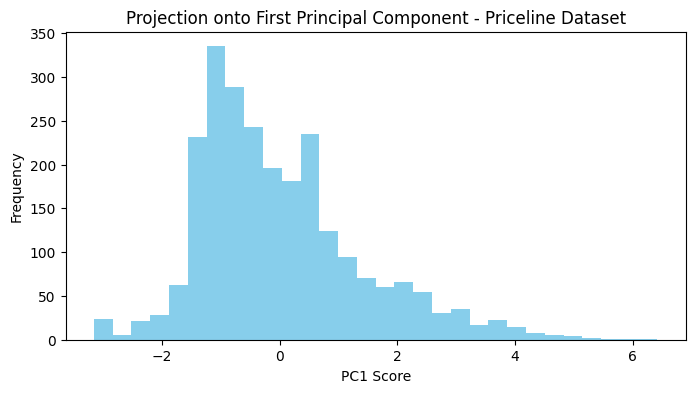


Linear Regression R² Scores:
Predicting travel_time_minutes from ['1st_stop_wait_minutes', '2nd_stop_wait_minutes', '3rd_stop_wait_minutes', 'stops', 'ticket_price_usd']: R² = 0.6096
Predicting 1st_stop_wait_minutes from ['travel_time_minutes', '2nd_stop_wait_minutes', '3rd_stop_wait_minutes', 'stops', 'ticket_price_usd']: R² = 0.3545
Predicting 2nd_stop_wait_minutes from ['travel_time_minutes', '1st_stop_wait_minutes', '3rd_stop_wait_minutes', 'stops', 'ticket_price_usd']: R² = 0.1203
Predicting 3rd_stop_wait_minutes from ['travel_time_minutes', '1st_stop_wait_minutes', '2nd_stop_wait_minutes', 'stops', 'ticket_price_usd']: R² = 0.0049
Predicting stops from ['travel_time_minutes', '1st_stop_wait_minutes', '2nd_stop_wait_minutes', '3rd_stop_wait_minutes', 'ticket_price_usd']: R² = 0.4847
Predicting ticket_price_usd from ['travel_time_minutes', '1st_stop_wait_minutes', '2nd_stop_wait_minutes', '3rd_stop_wait_minutes', 'stops']: R² = 0.1557

Number of outliers detected: 147

Summary:
Nu

In [11]:
df1 = pd.read_csv("priceline_clean_no_encode.csv")
analyze_dataset(df1, "Priceline Dataset")

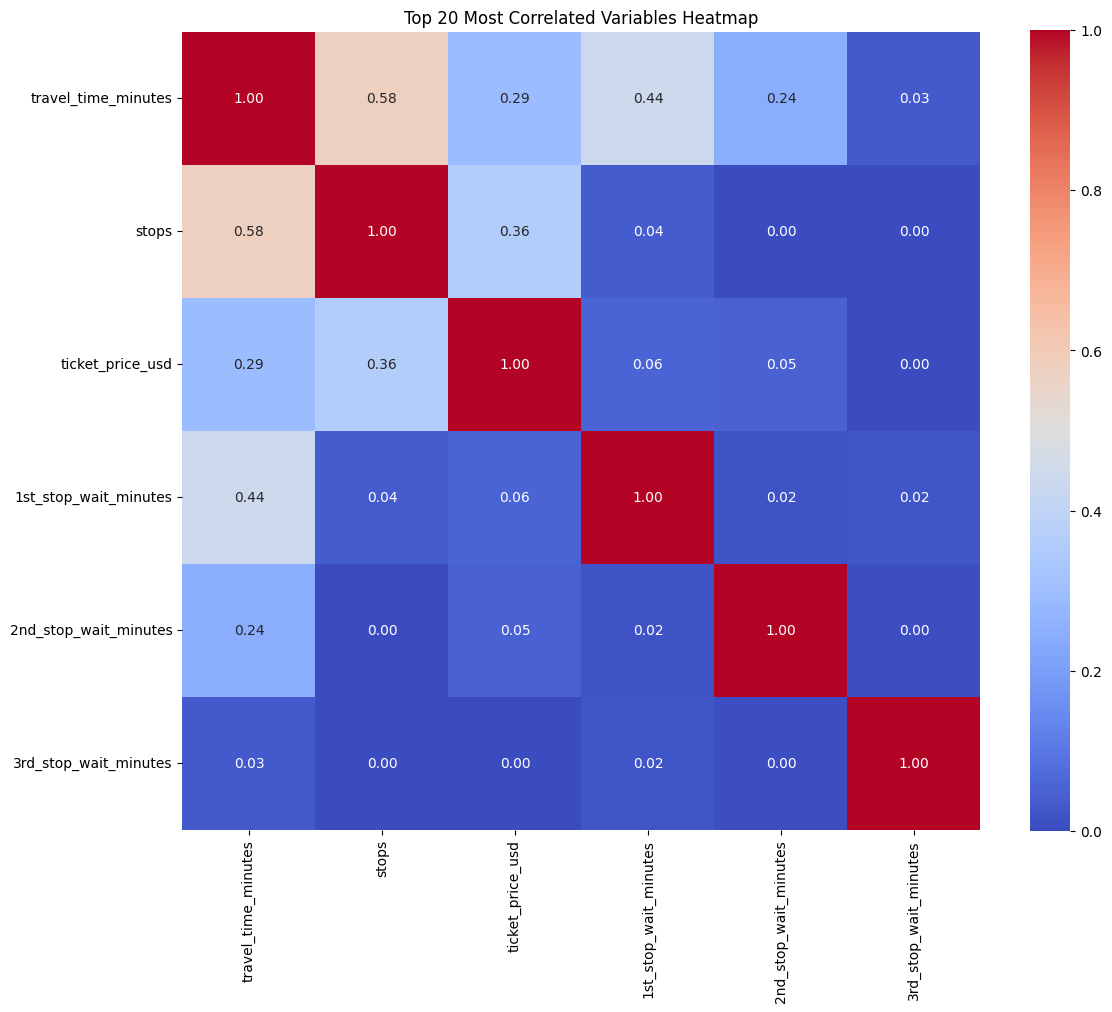

In [12]:
plot_top_correlated_heatmap(df1, 20)

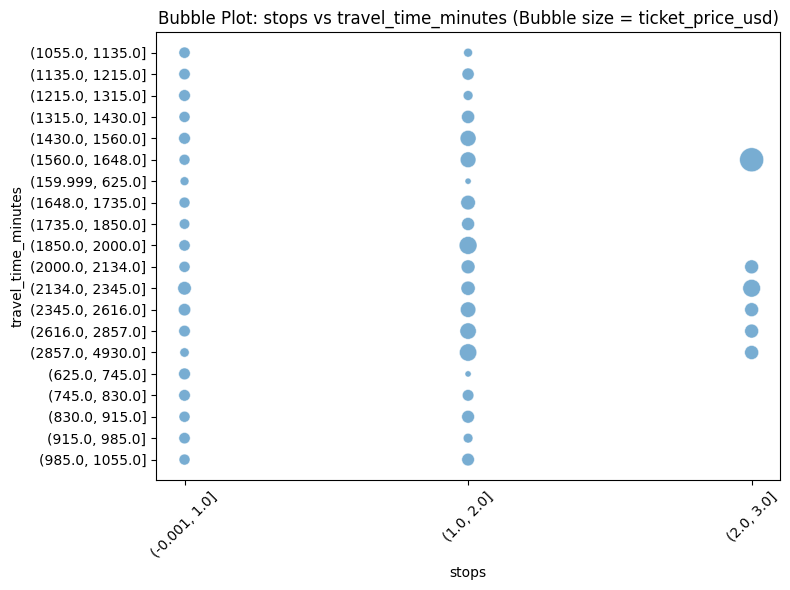

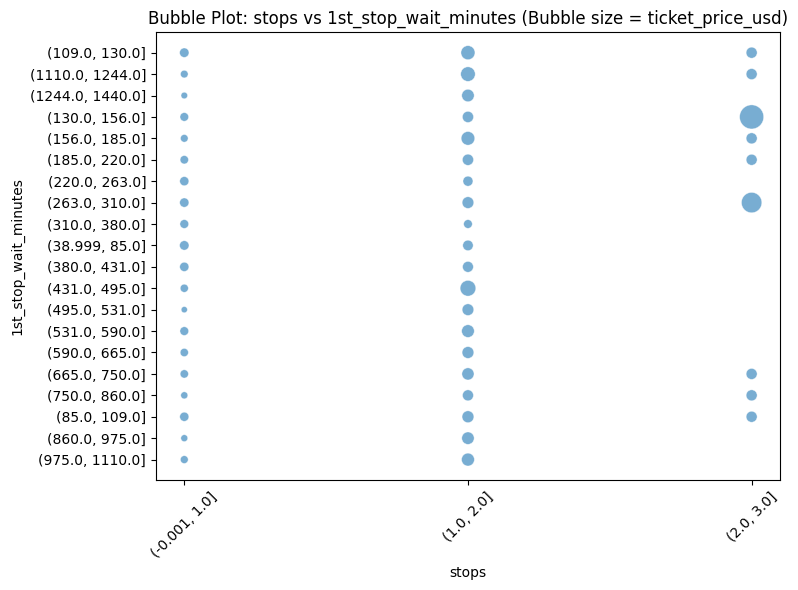

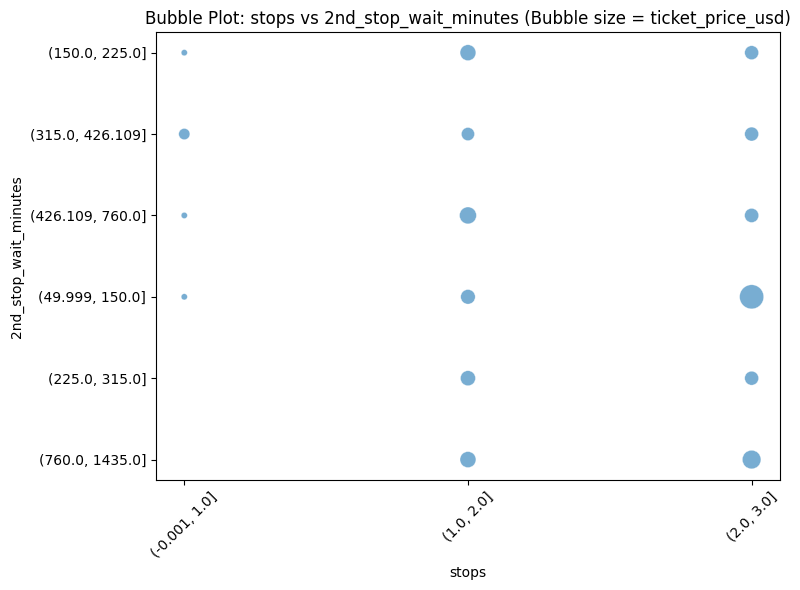

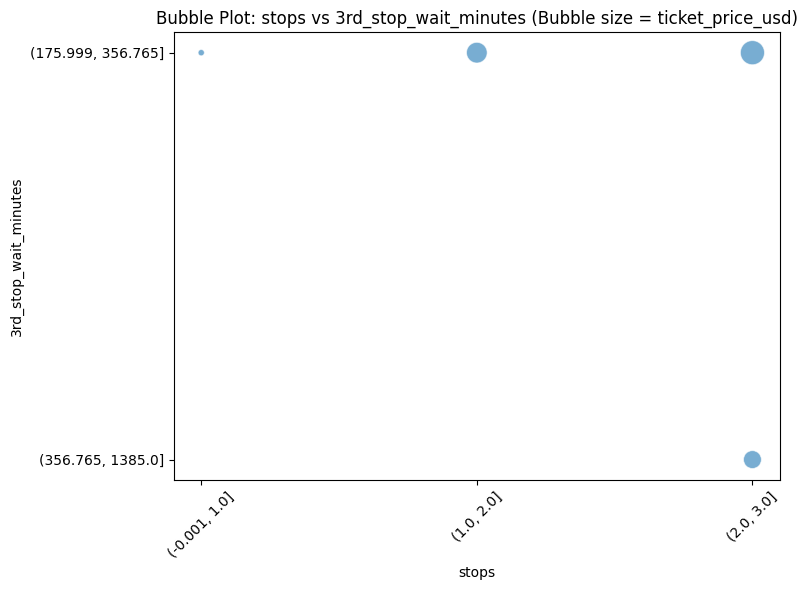

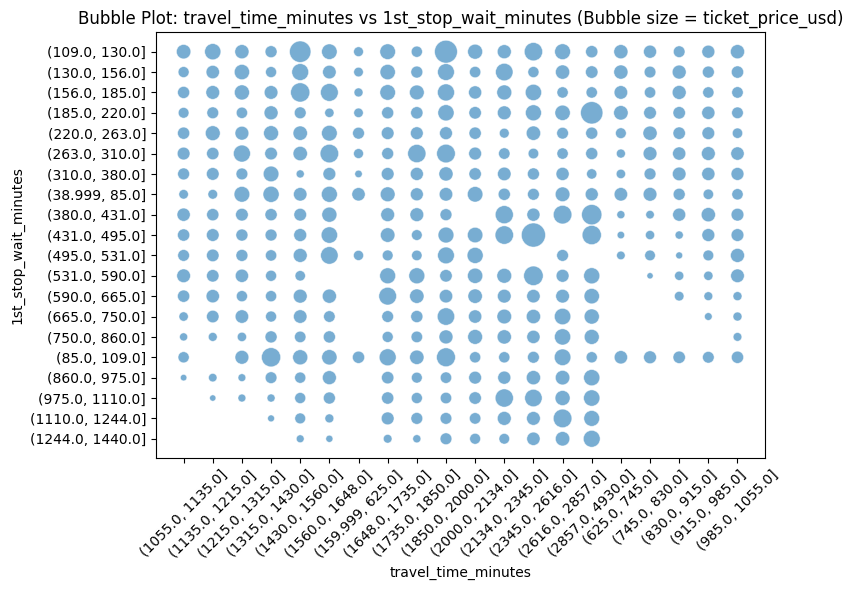

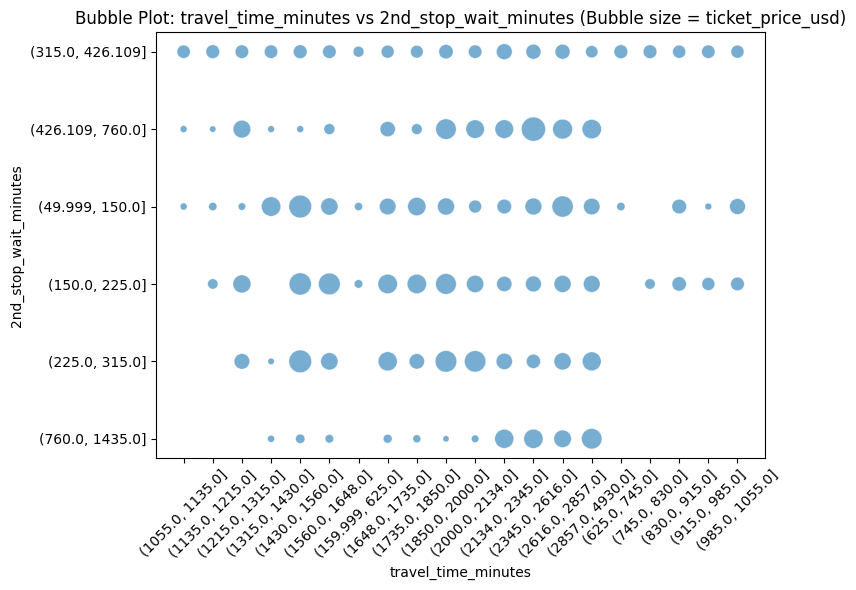

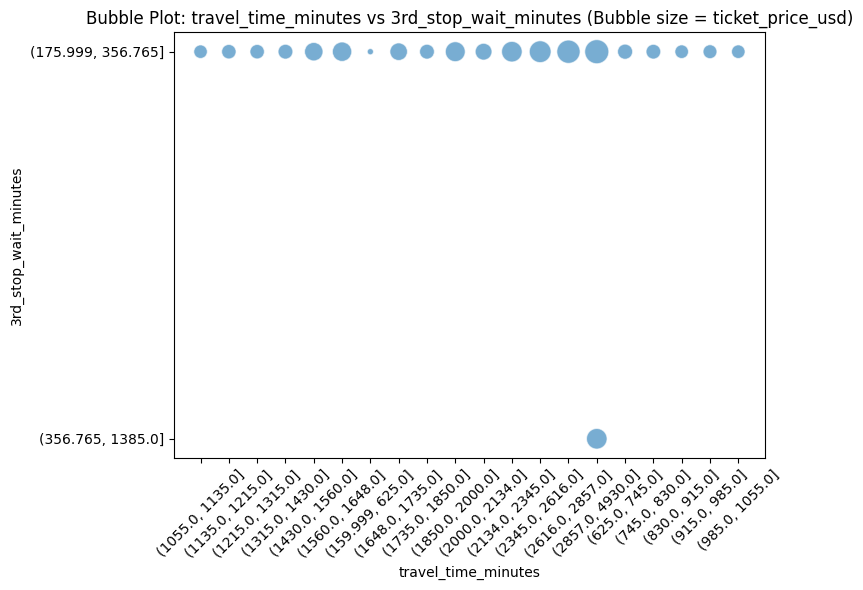

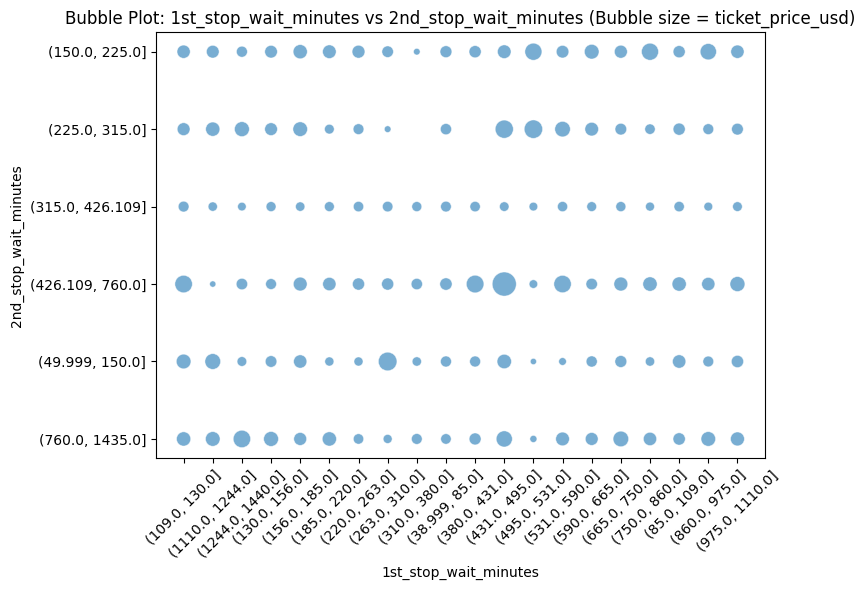

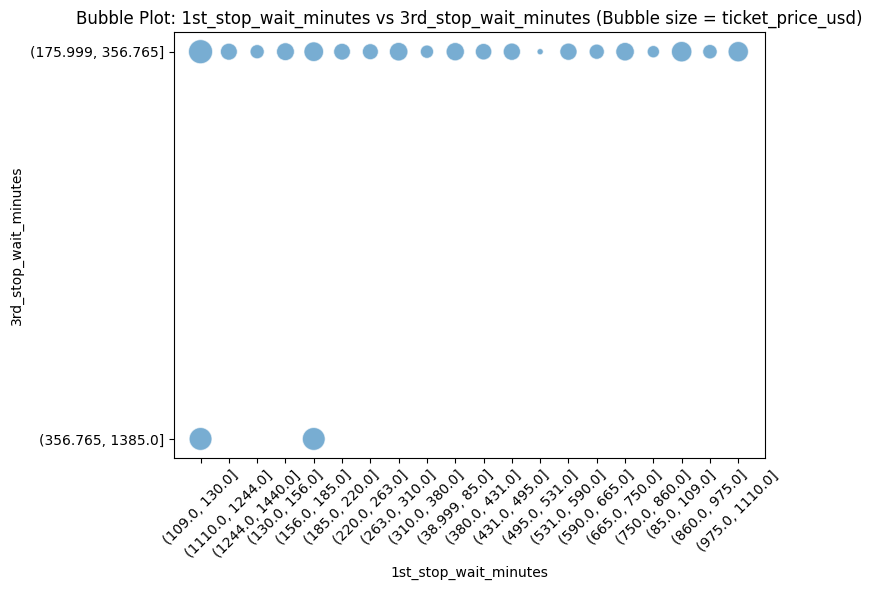

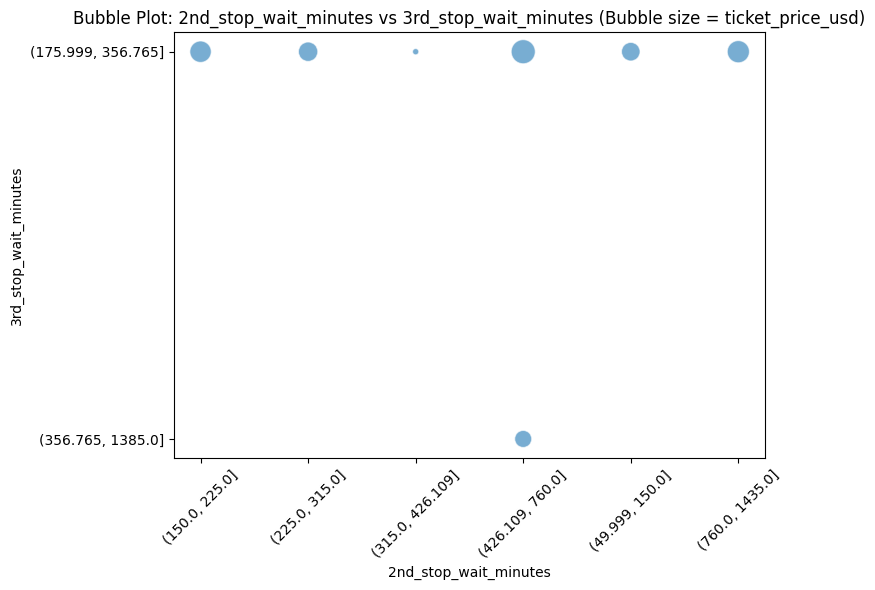

In [27]:
generate_top_binned_bubble_plots(df1, target_variable="ticket_price_usd", bin_method="quantile", bins=20, top_n=20)

In [37]:

result = backward_selection(df1, target_variable="ticket_price_usd")
print(result["selected_features"])
print(result["final_r2"])
print(result["removal_history"])


['travel_time_minutes', '1st_stop_wait_minutes', '2nd_stop_wait_minutes', '3rd_stop_wait_minutes']
0.12814008771746377
[('stops', 0.12814008771746377)]


## Flight Delay Dataset


--- Analysis for Flight Delay Dataset ---

Explained Variance Ratio: [8.41075697e-02 5.87546238e-02 5.31319211e-02 4.71438452e-02
 4.47964449e-02 3.87170796e-02 3.72826405e-02 3.13866225e-02
 2.85051679e-02 2.71382584e-02 2.56790853e-02 2.46527676e-02
 2.41999105e-02 2.28875488e-02 2.24561849e-02 2.18359529e-02
 2.08362691e-02 2.04630473e-02 2.01689240e-02 1.99729222e-02
 1.97366497e-02 1.95095358e-02 1.91064347e-02 1.88583687e-02
 1.83948234e-02 1.82958730e-02 1.80711460e-02 1.66013617e-02
 1.60055957e-02 1.57225019e-02 1.47623533e-02 1.41818104e-02
 1.36082891e-02 1.31562061e-02 1.11162218e-02 1.05839433e-02
 1.02598067e-02 9.93967797e-03 8.95811254e-03 8.50090302e-03
 7.58463456e-03 6.15998622e-03 5.59504294e-03 3.60339658e-03
 3.14764305e-03 2.57216442e-03 1.07716764e-03 7.55280865e-04
 1.82826384e-05 1.36028906e-17 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
PCA Components:
 [[-2.27380217e-02 -1.41712690e-01  1.29011024e-01 ... -1.03940221e-01
   1.71789406e-01  1.18983808e-01

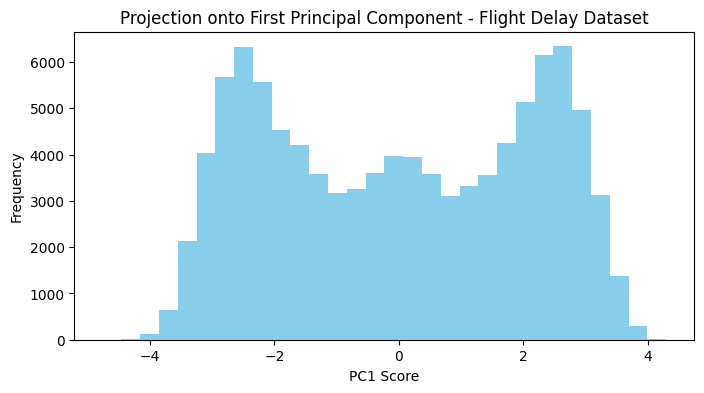


Linear Regression R² Scores:
Predicting depdelay from ['marketshareorigin', 'marketsharedest', 'hhiorigin', 'hhidest', 'nonhubairportorigin', 'smallhubairportorigin', 'mediumhubairportorigin', 'largehubairportorigin', 'nonhubairportdest', 'smallhubairportdest', 'mediumhubairportdest', 'largehubairportdest', 'nonhubairlineorigin', 'smallhubairlineorigin', 'mediumhubairlineorigin', 'largehubairlineorigin', 'nonhubairlinedest', 'smallhubairlinedest', 'mediumhubairlinedest', 'largehubairlinedest', 'year', 'month', 'dayofmonth', 'dayofweek', 'scheduledhour', 'originairportid', 'destairportid', 'capacity', 'loadfactor', 'numflights', 'distance', 'monopolyroute', 'temperature', 'temp_ninfty_n10', 'temp_n10_0', 'temp_0_10', 'temp_10_20', 'temp_20_30', 'temp_30_40', 'temp_40_infty', 'windspeed', 'windspeedsquare', 'windgustdummy', 'windgustspeed', 'raindummy', 'raintracedummy', 'snowdummy', 'snowtracedummy', 'originmetropop', 'originmetrogdppercapita', 'destmetropop', 'destmetrogdppercapita']:

In [33]:
df2 = pd.read_csv("delay_data_clean_no_encode.csv")
df2 = df2.drop(columns="arrdelay") # Dropping this column due to data leakage when predicting depdelay
# Generating a random sample of 100k to make the data more manageable.
df2_samp = df2.sample(n=100000, random_state=42)
analyze_dataset(df2_samp, "Flight Delay Dataset")

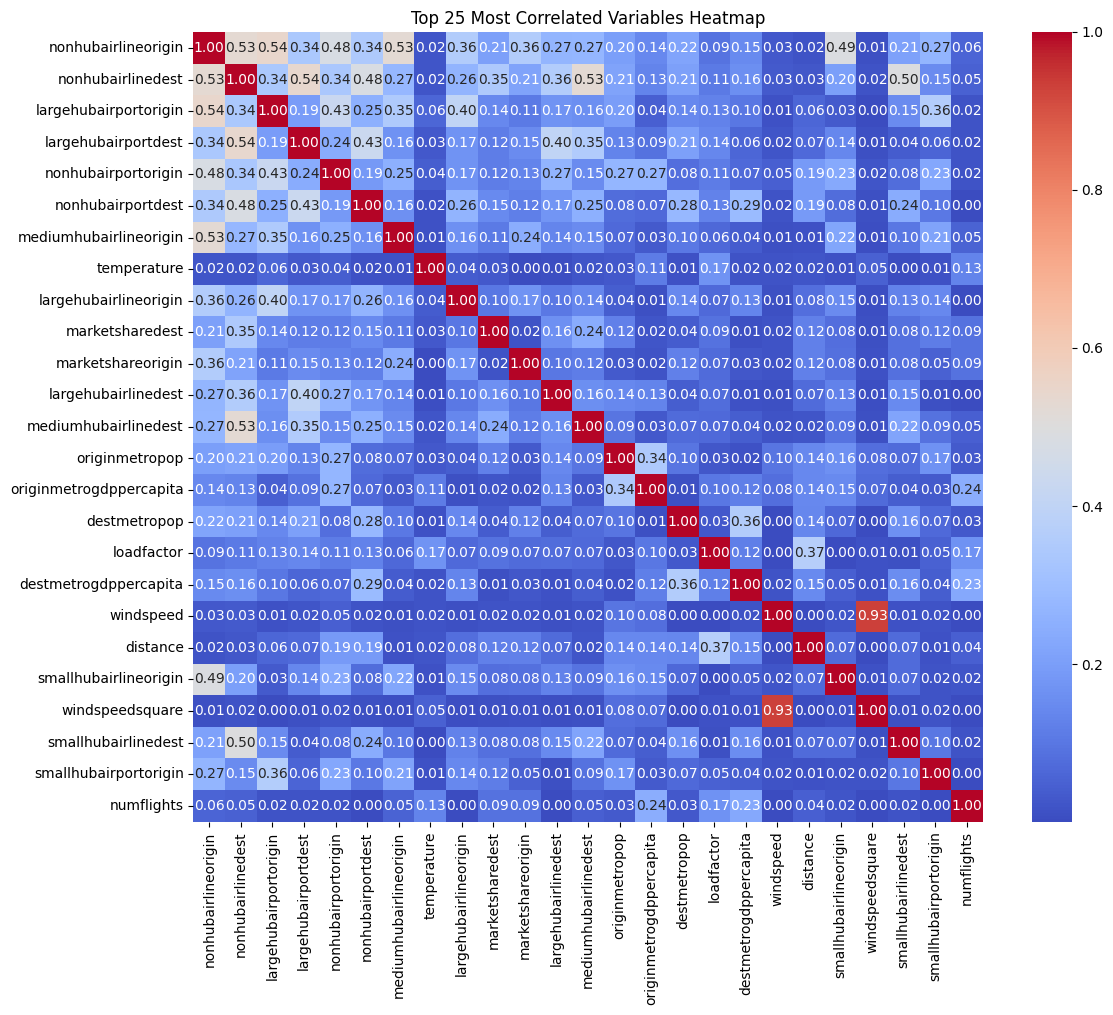

In [34]:
plot_top_correlated_heatmap(df2_samp, 25)

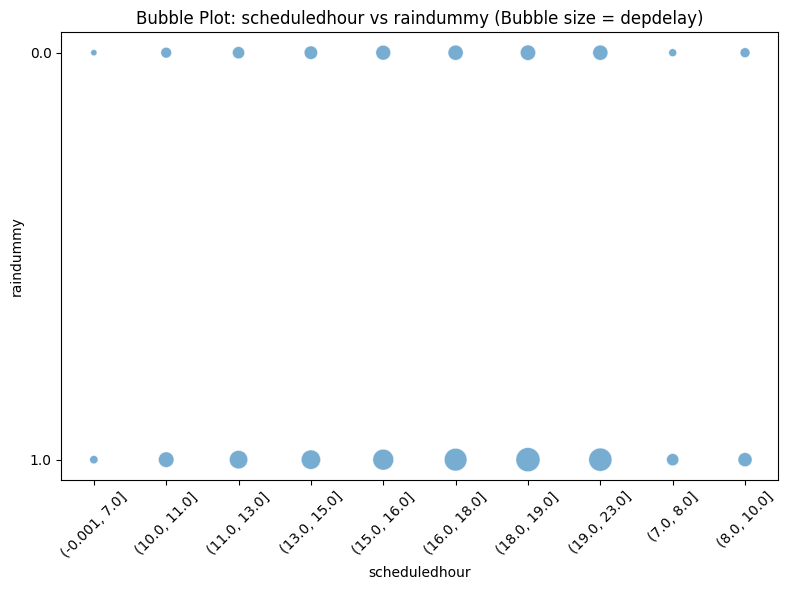

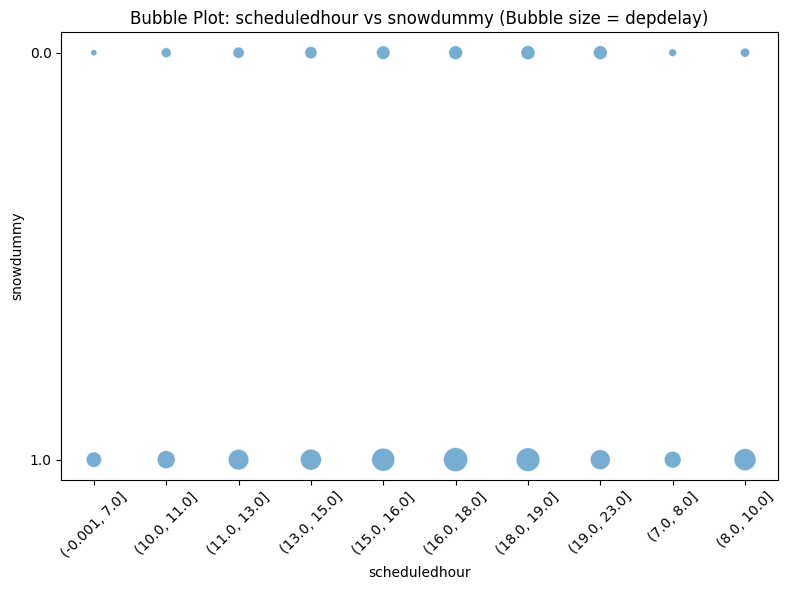

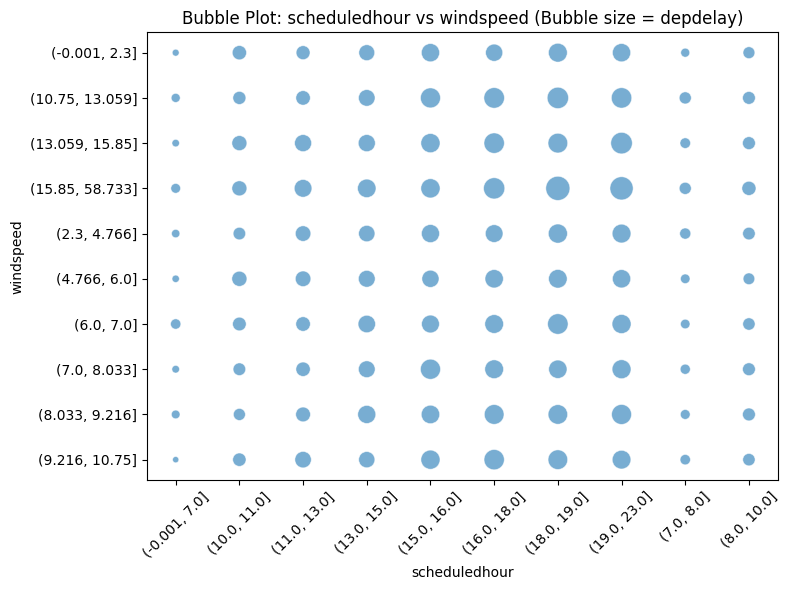

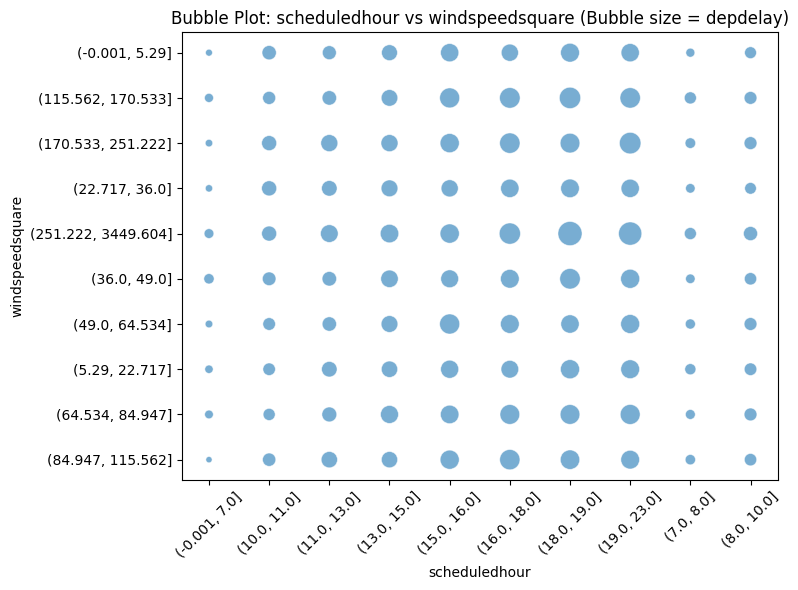

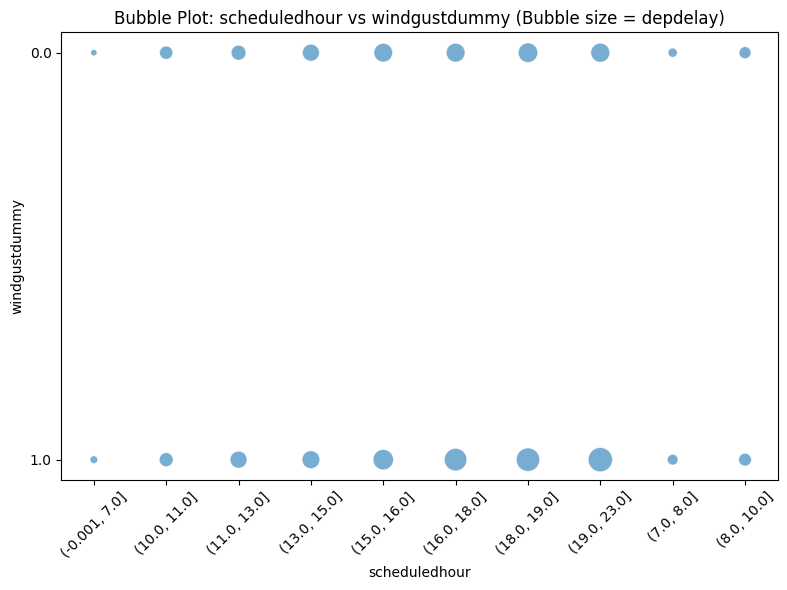

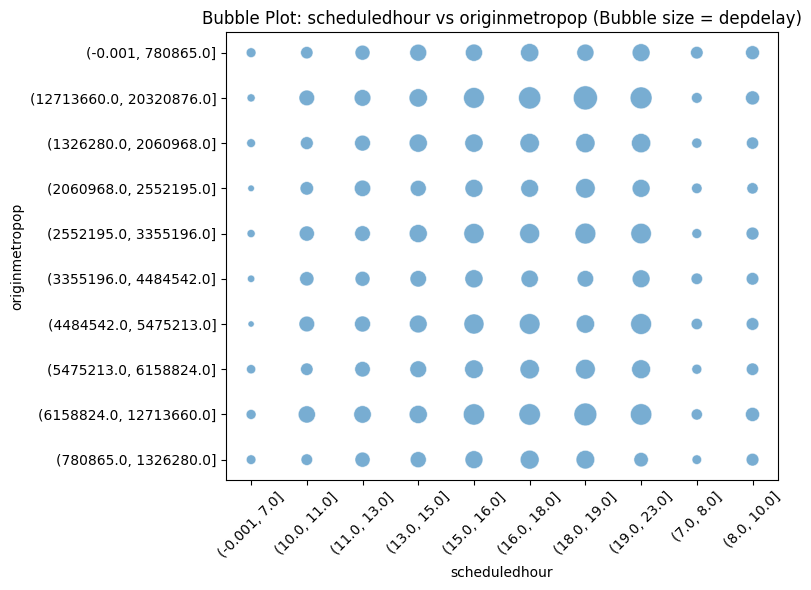

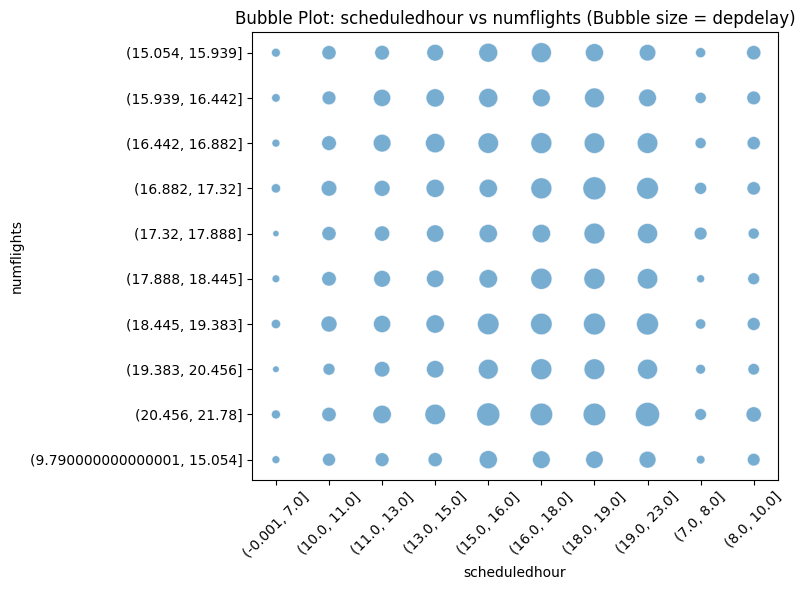

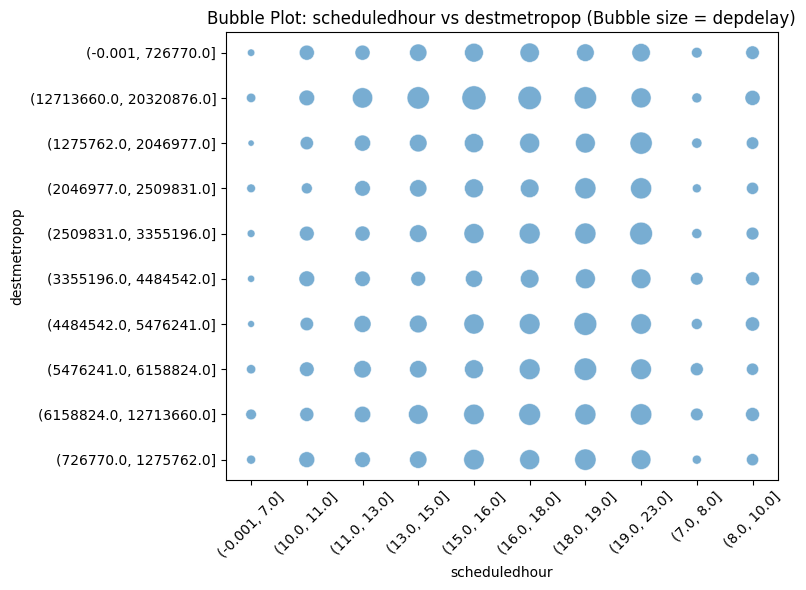

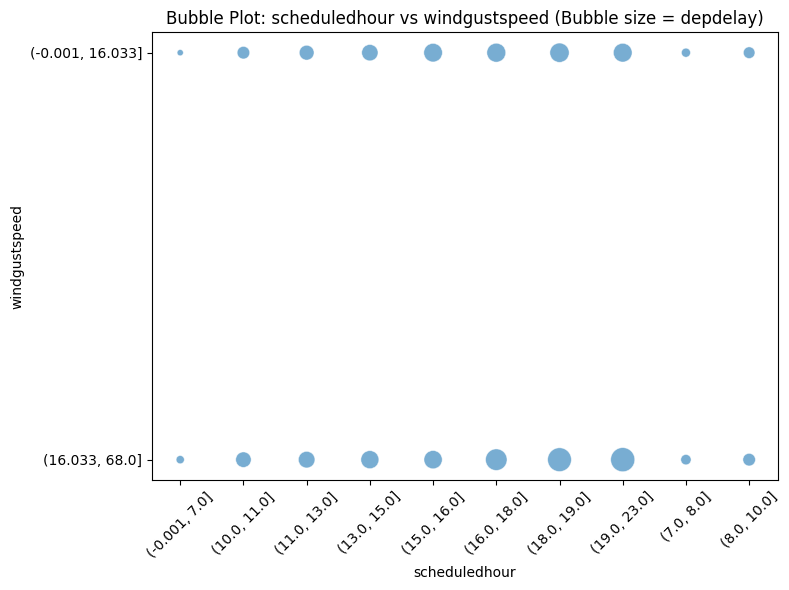

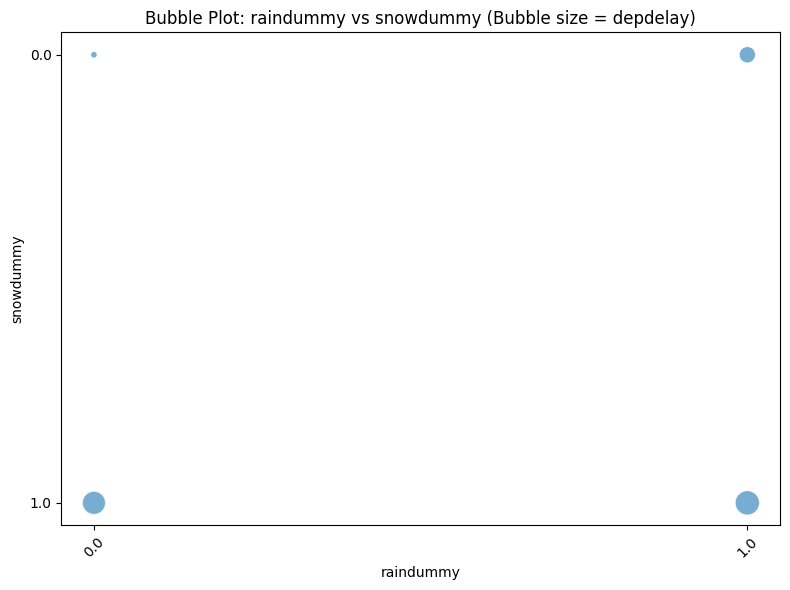

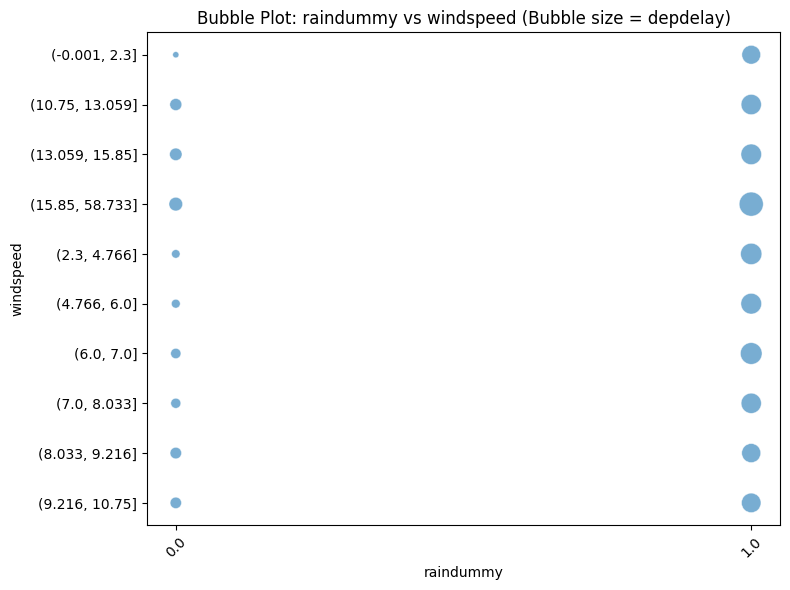

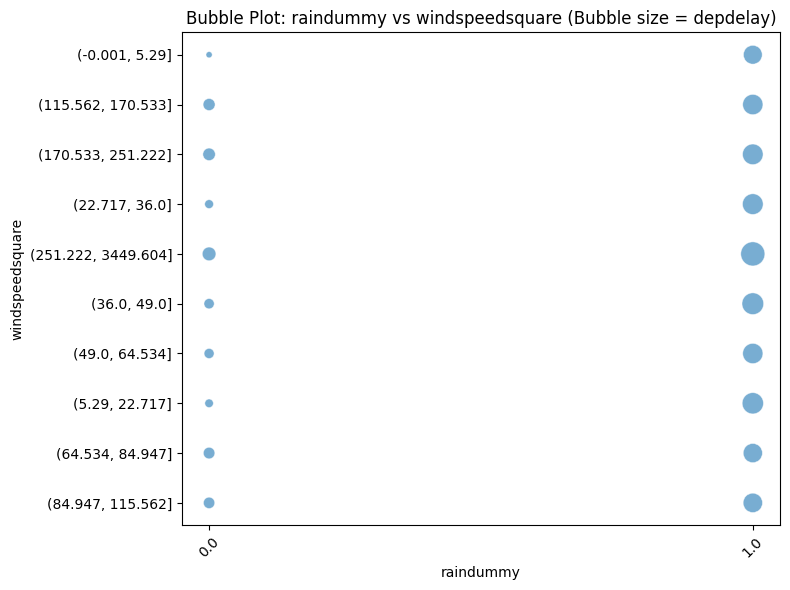

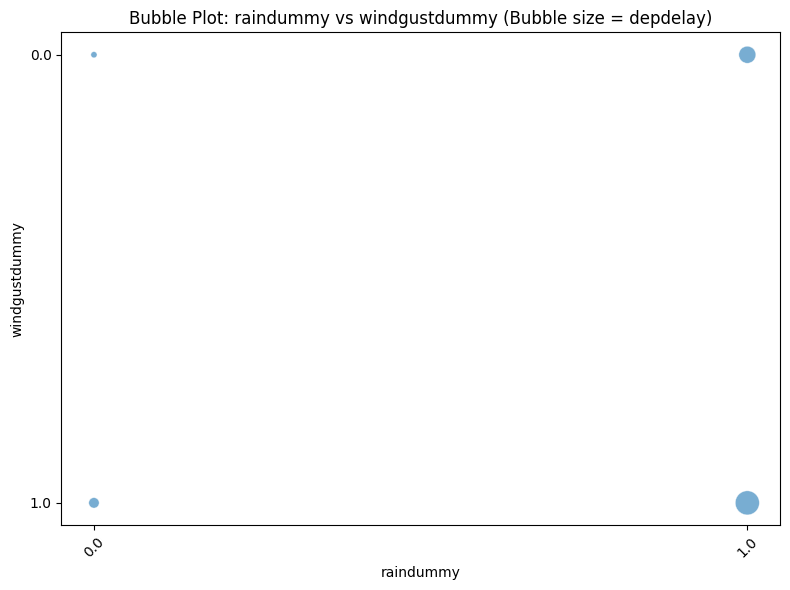

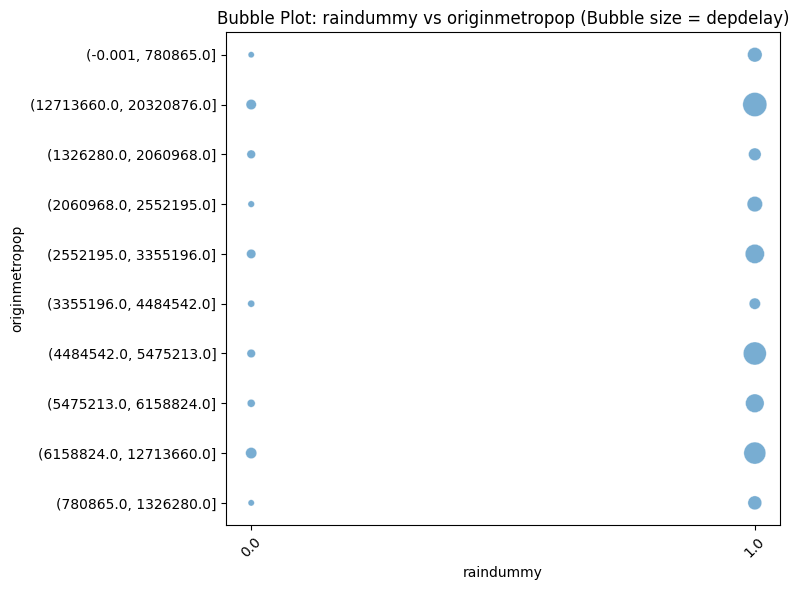

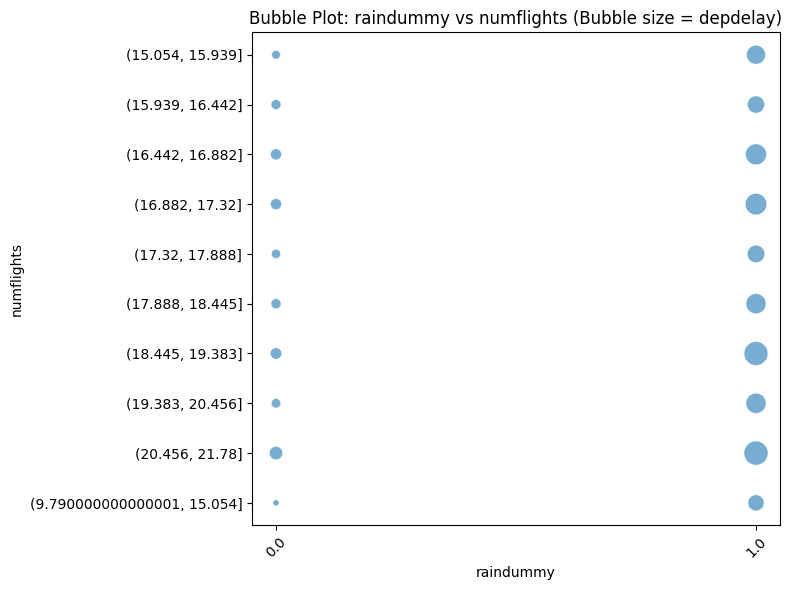

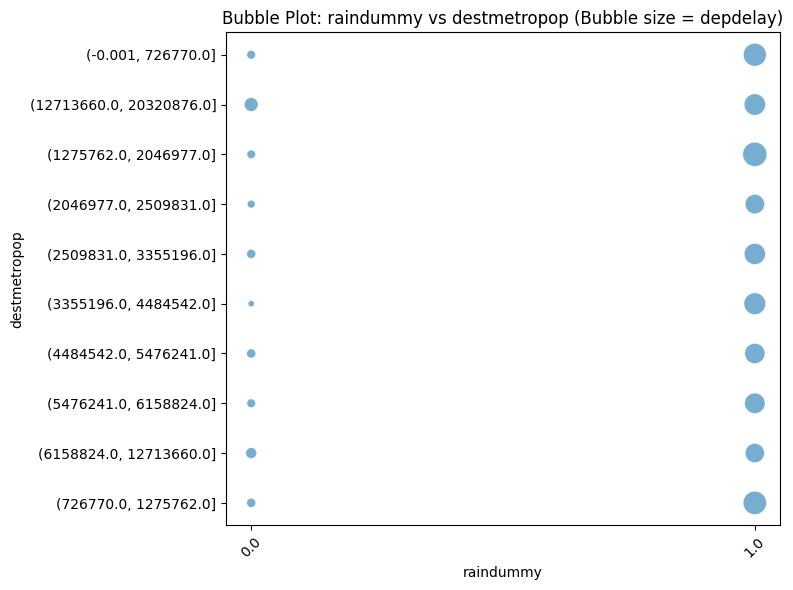

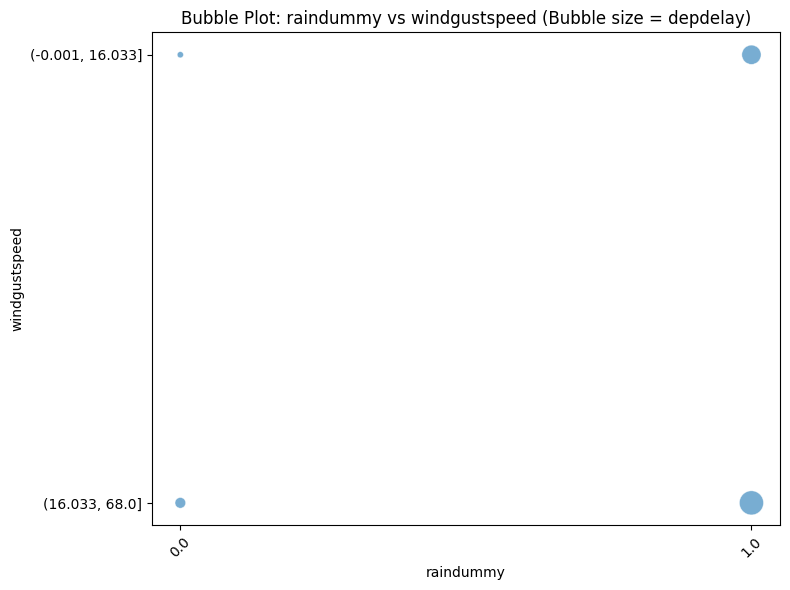

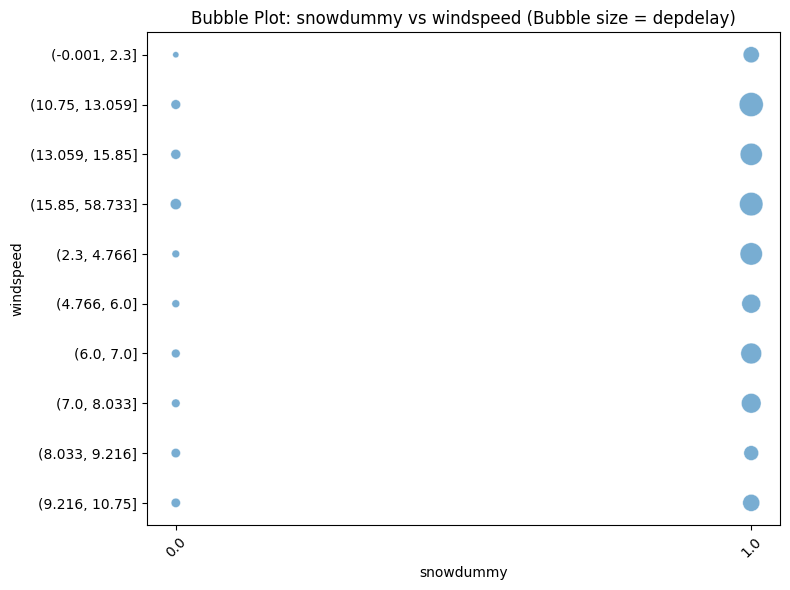

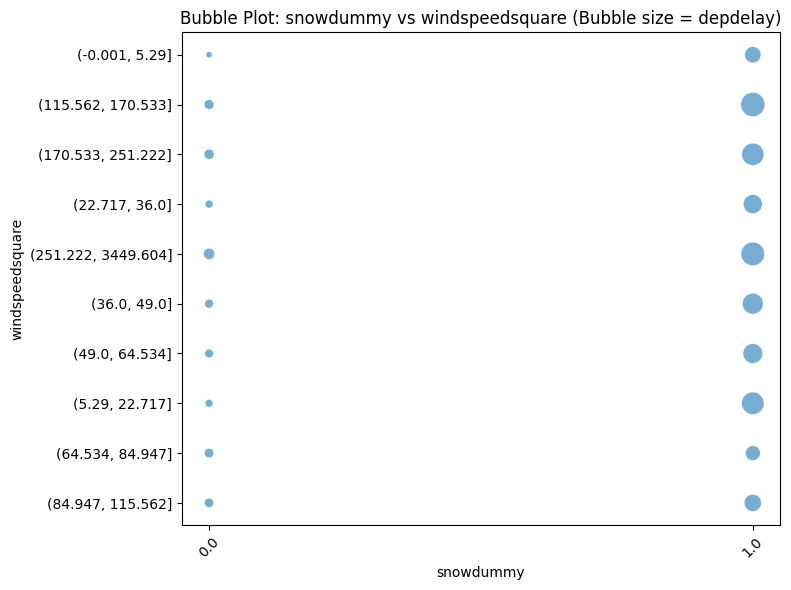

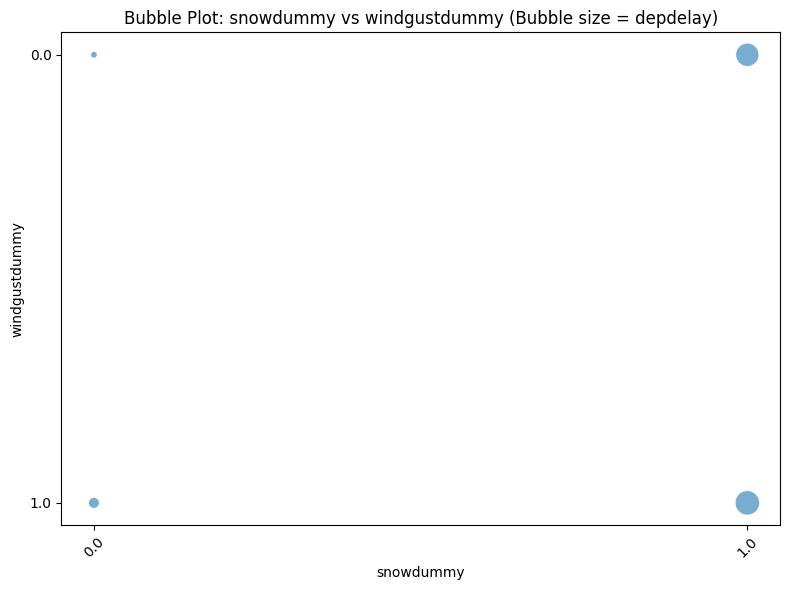

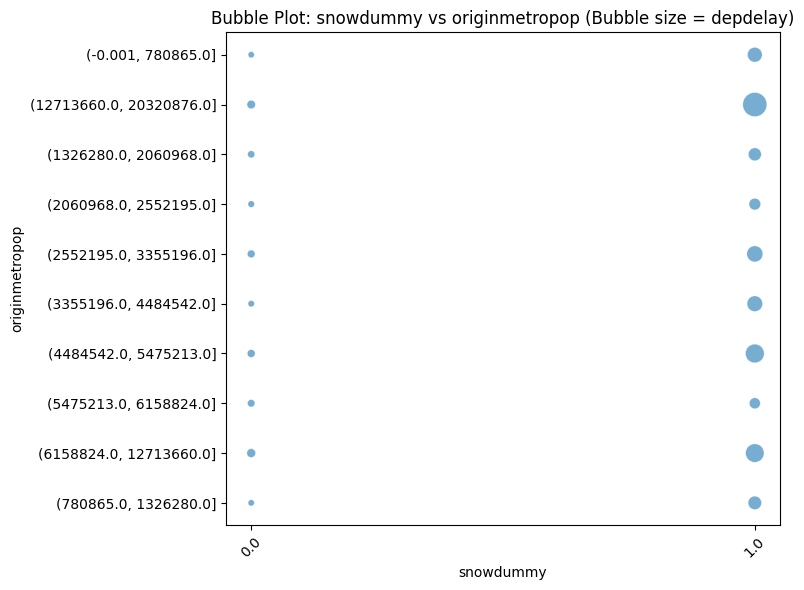

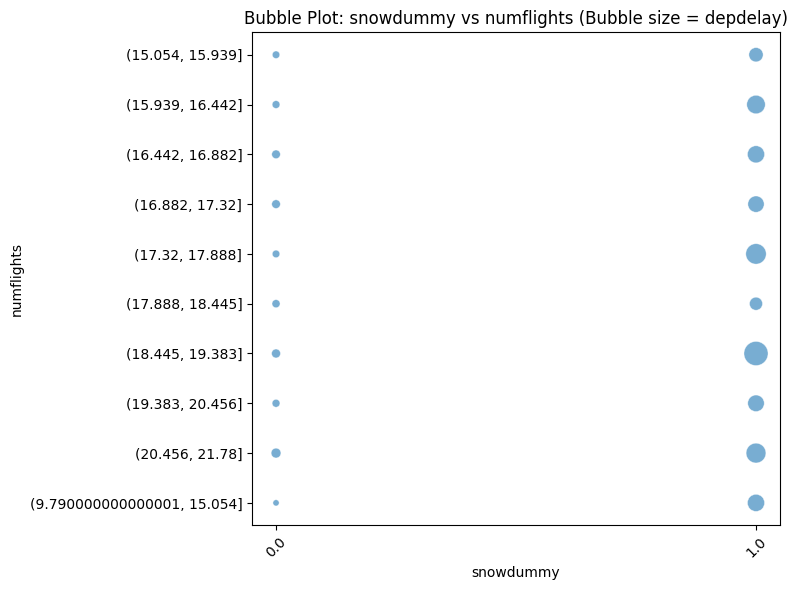

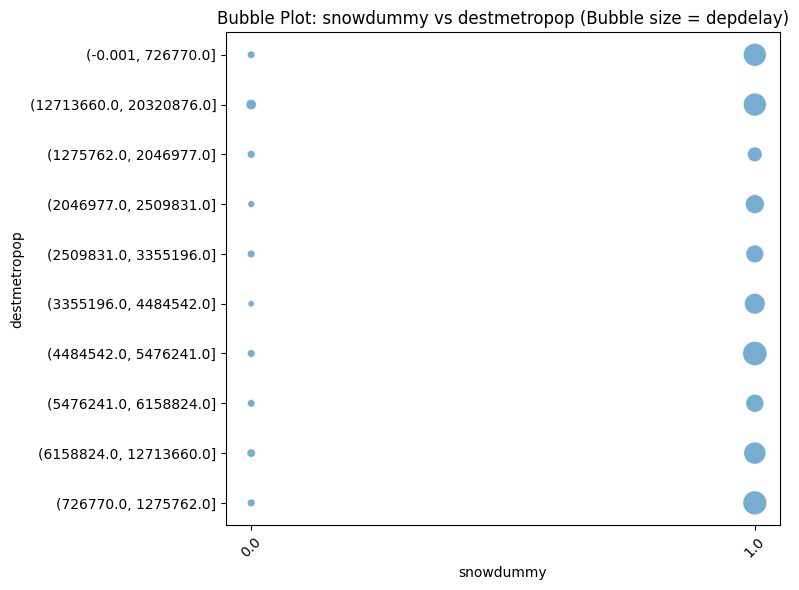

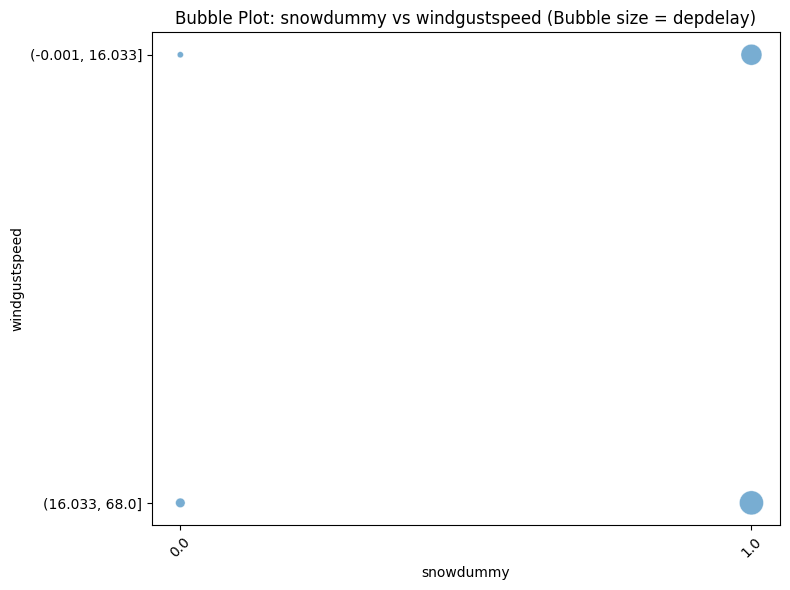

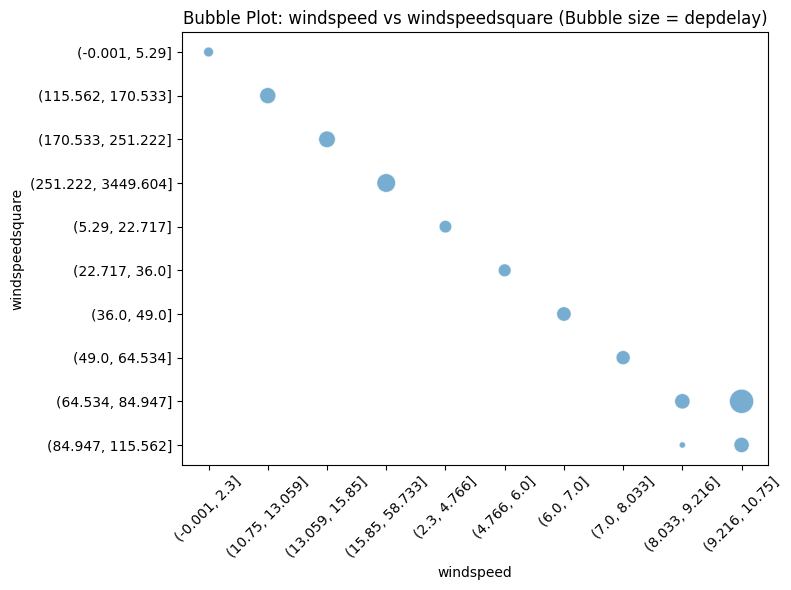

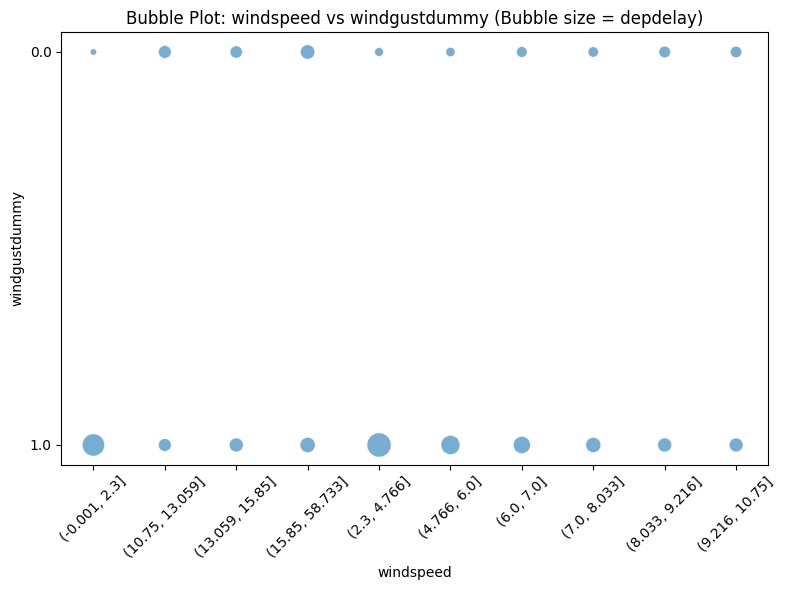

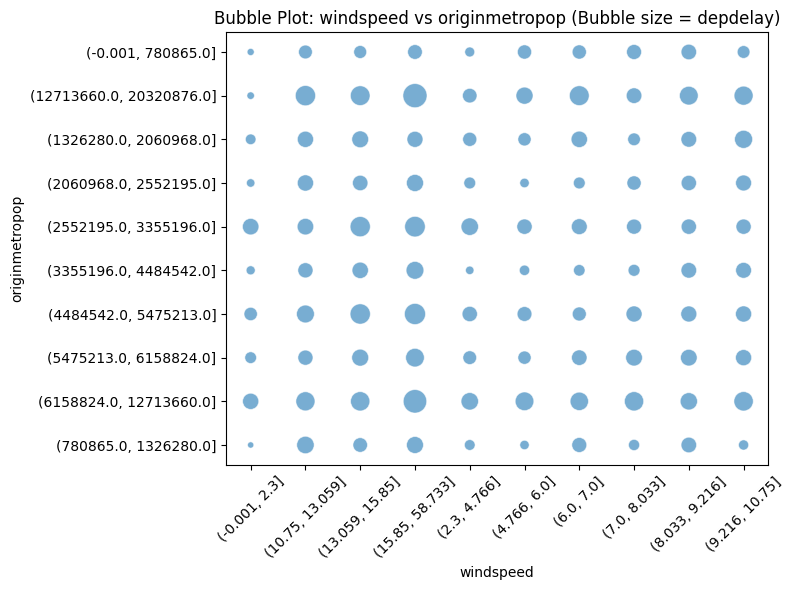

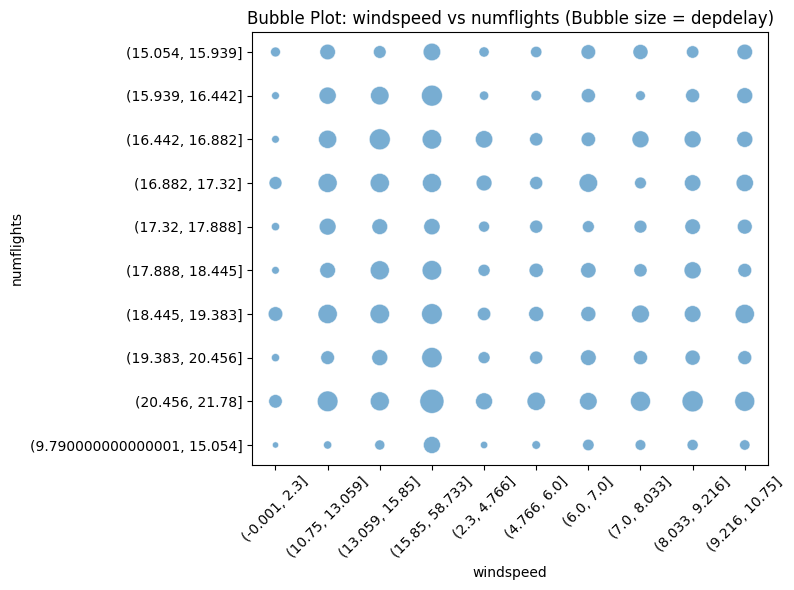

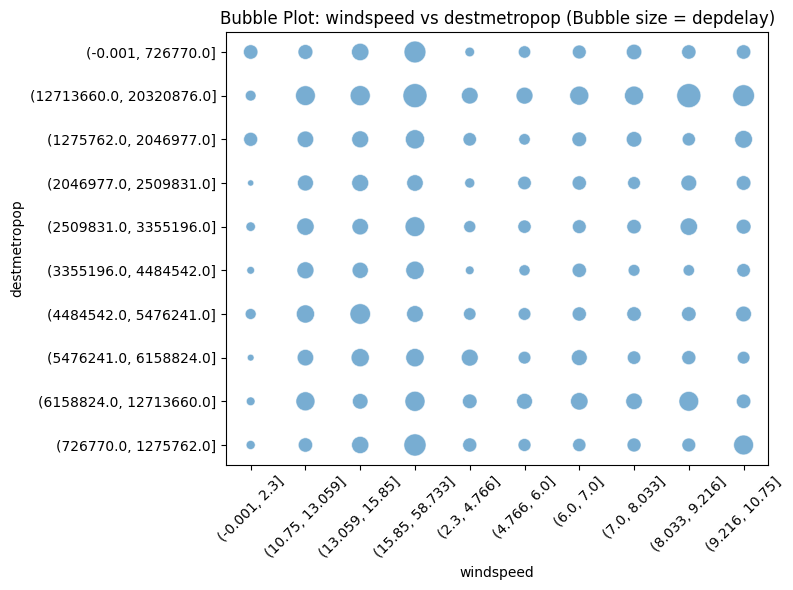

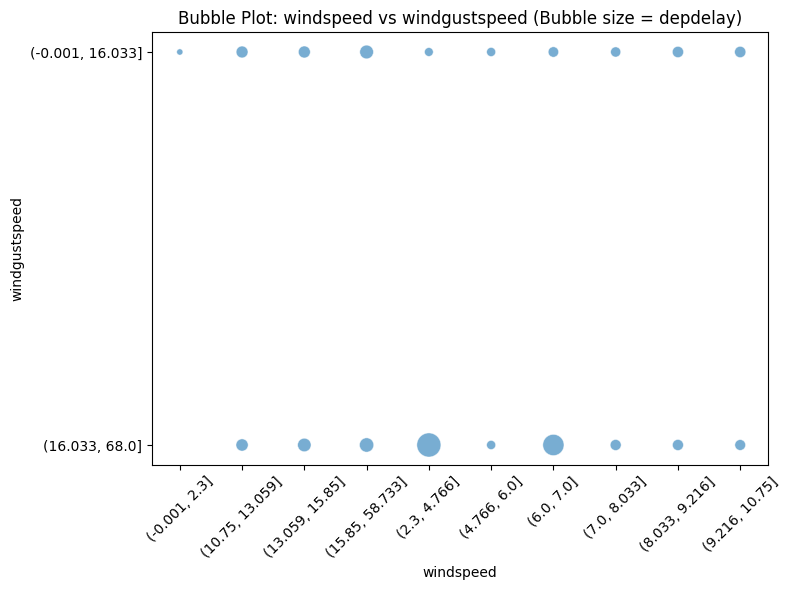

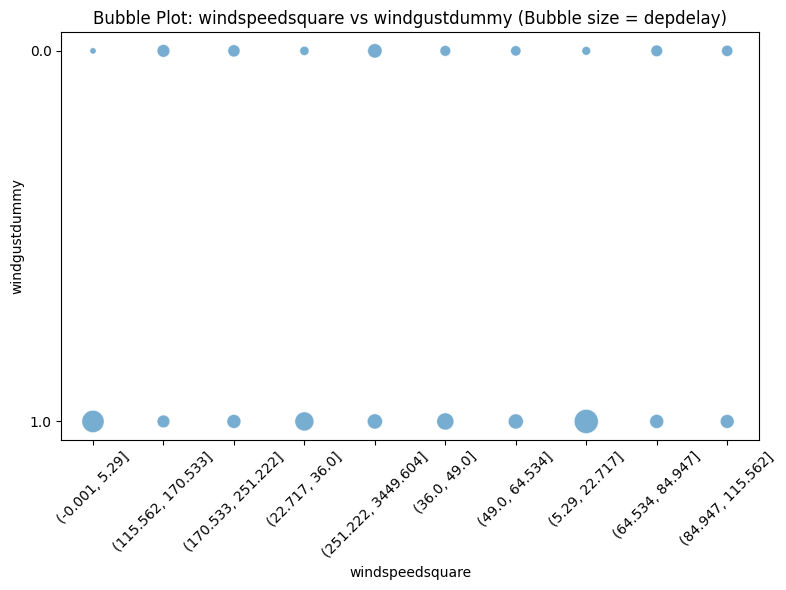

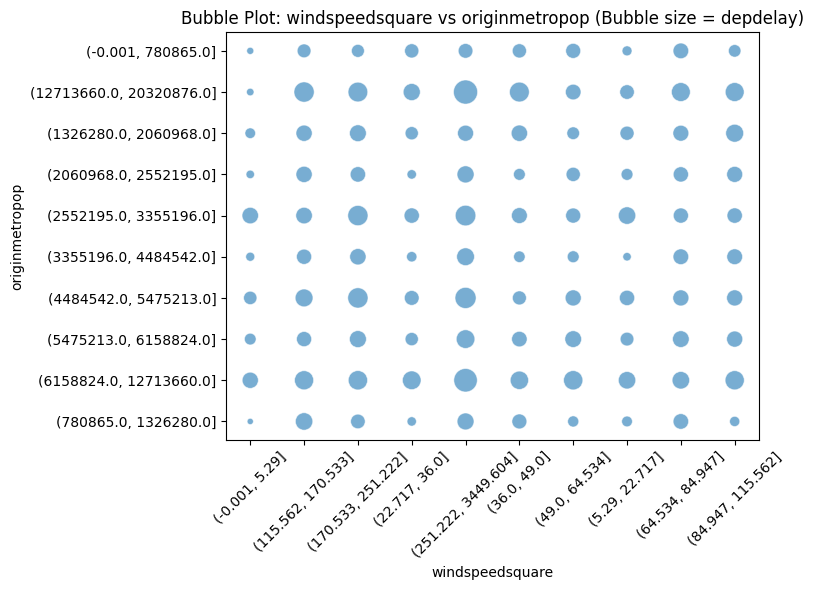

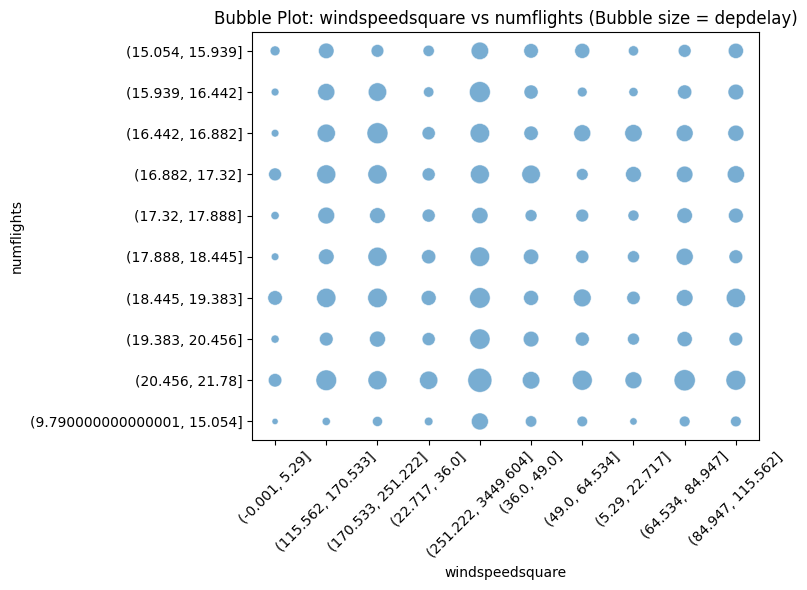

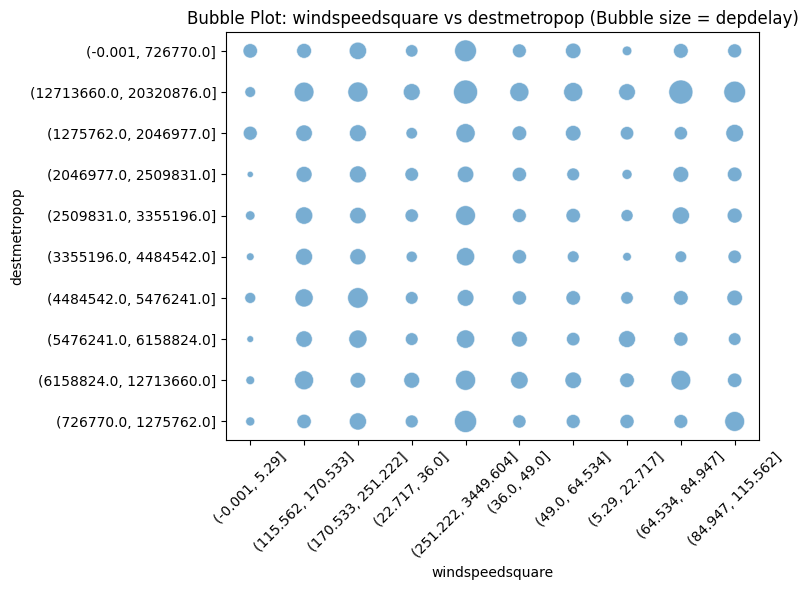

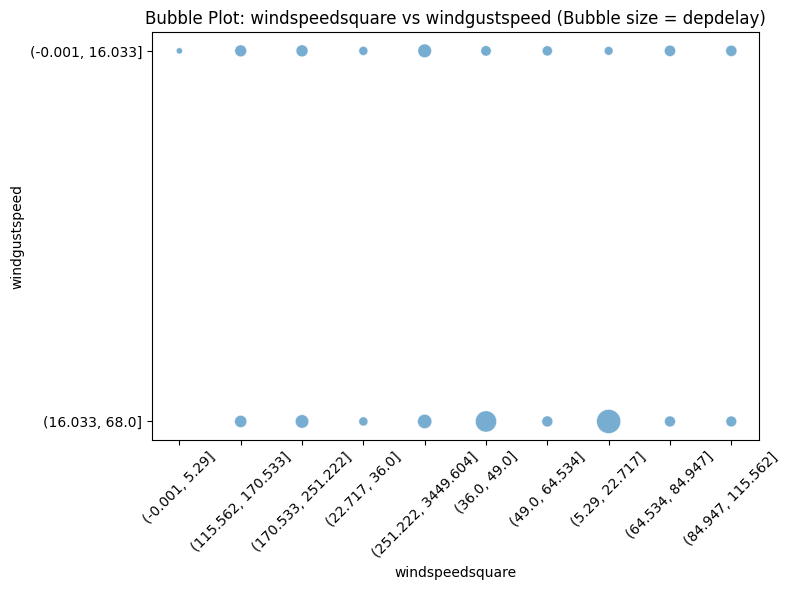

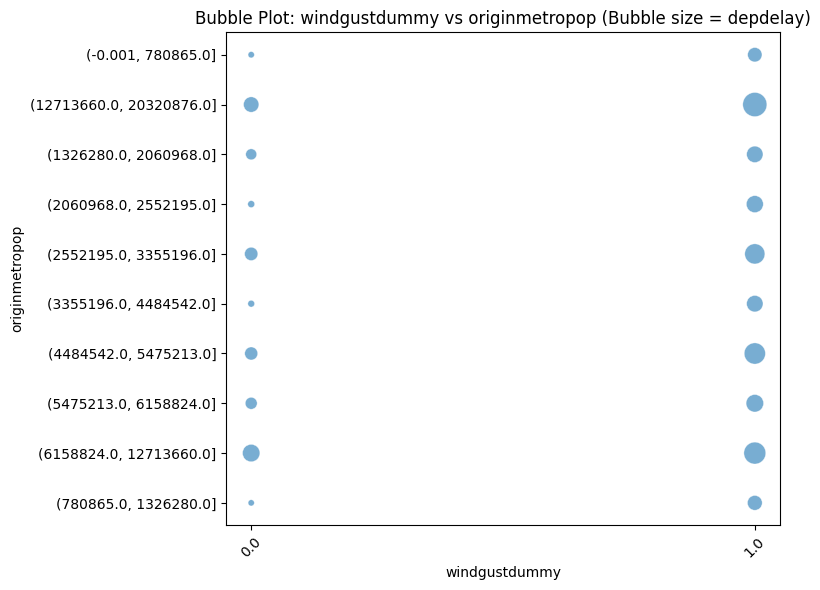

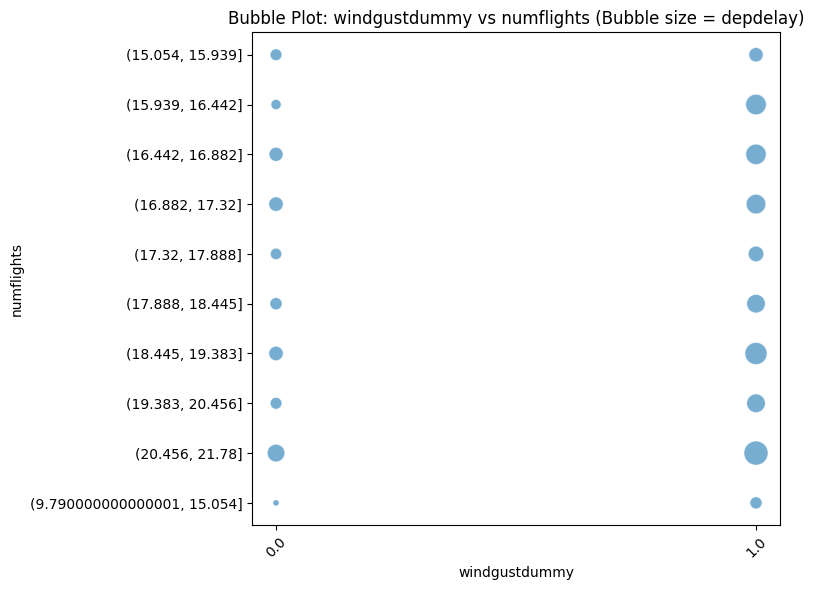

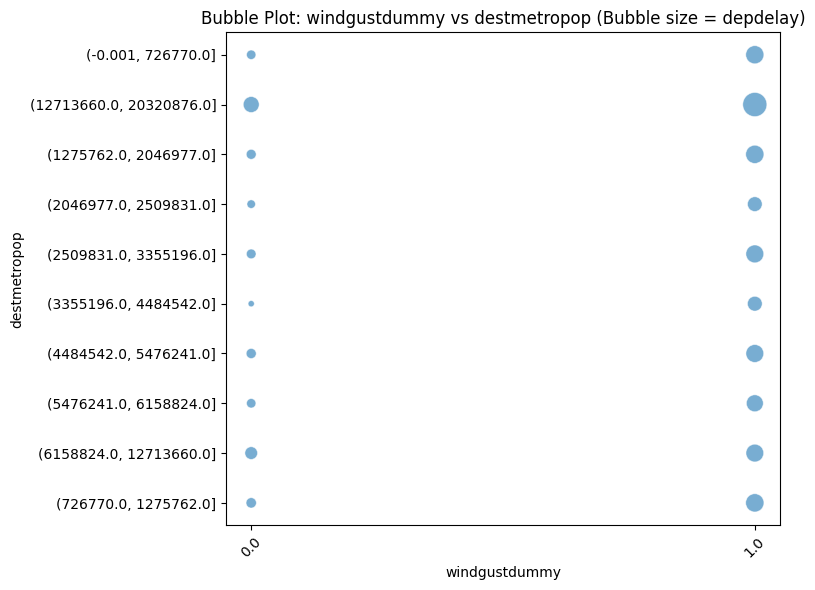

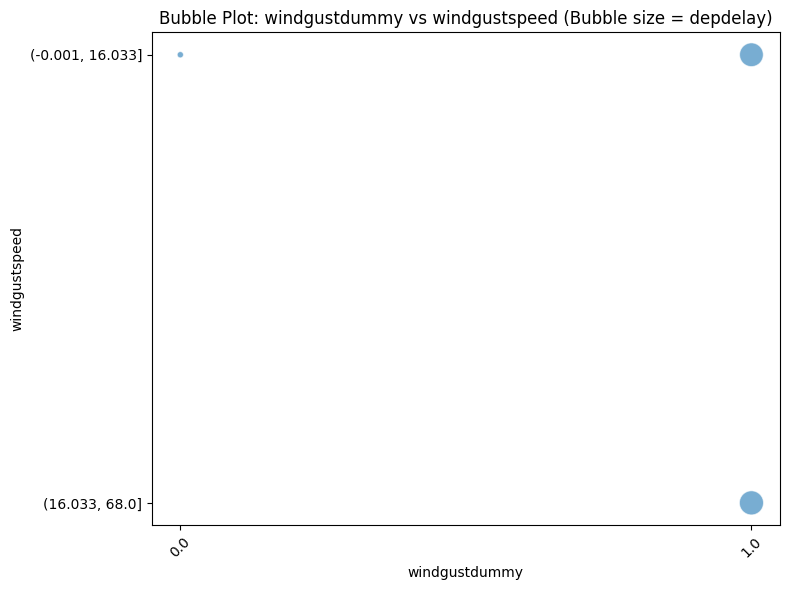

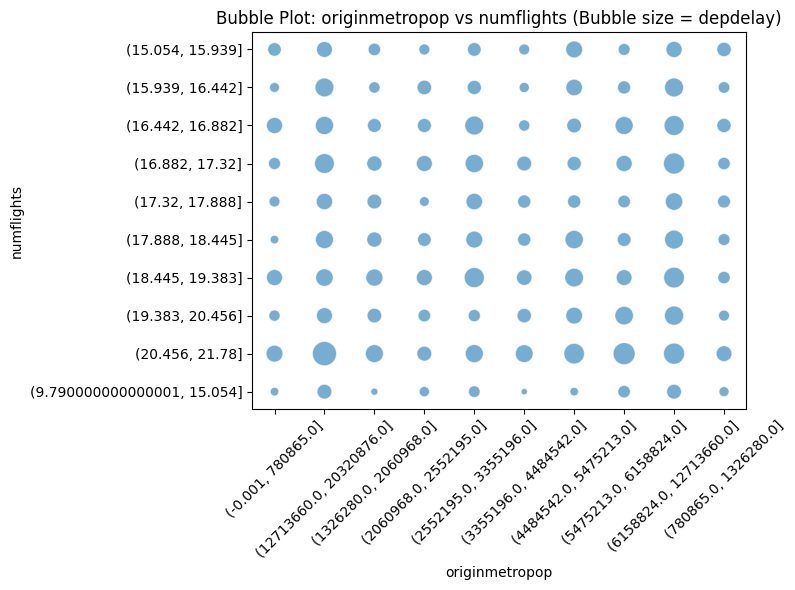

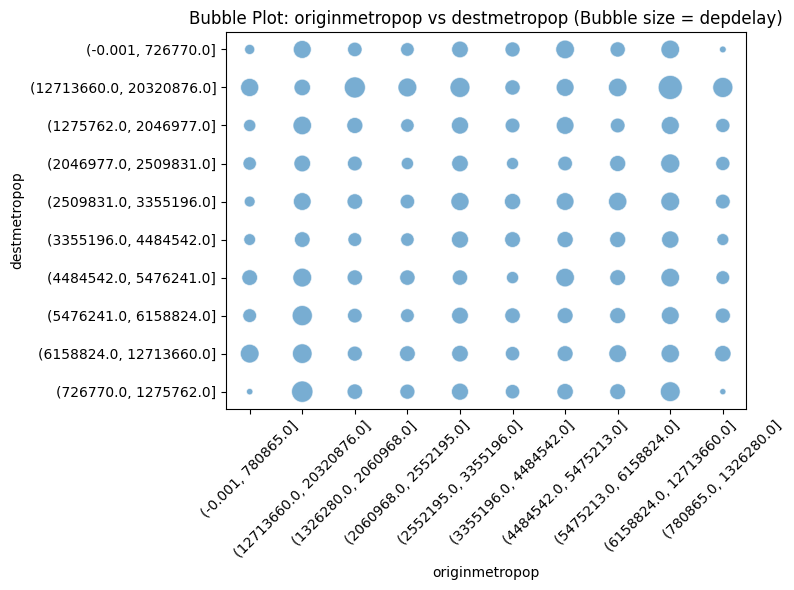

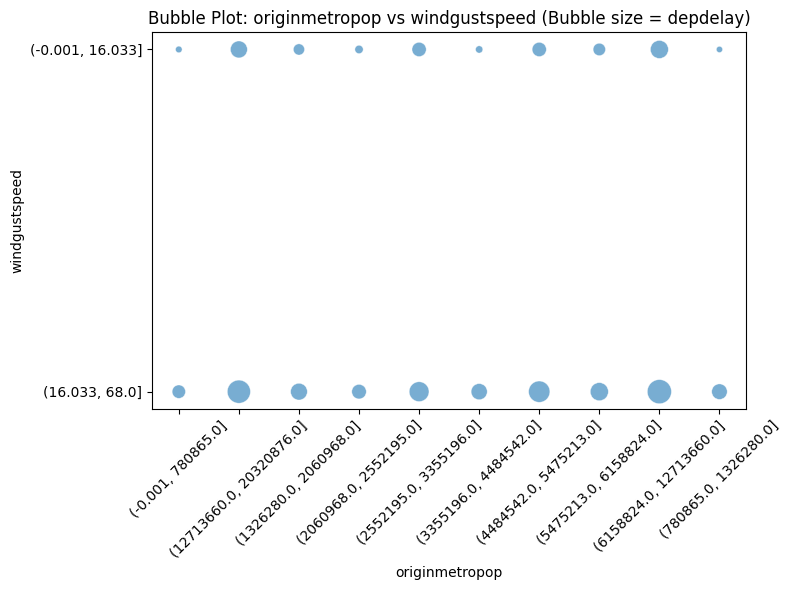

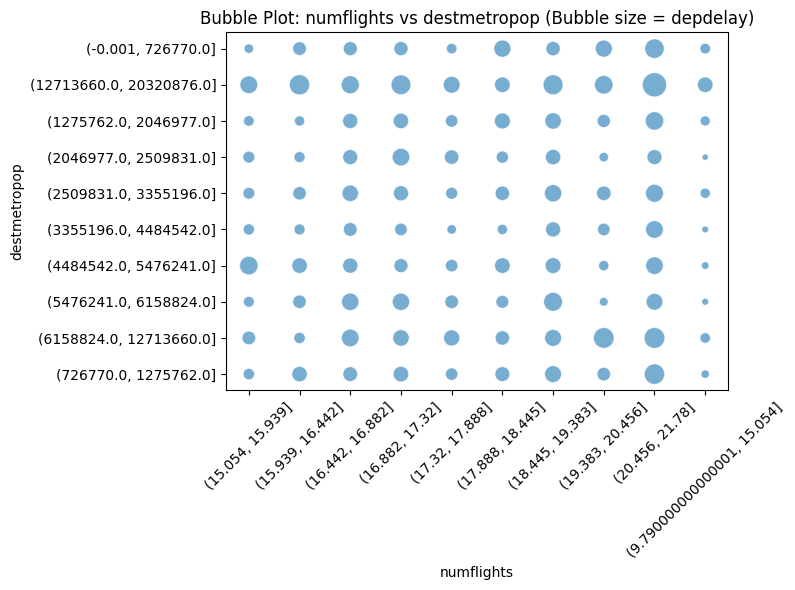

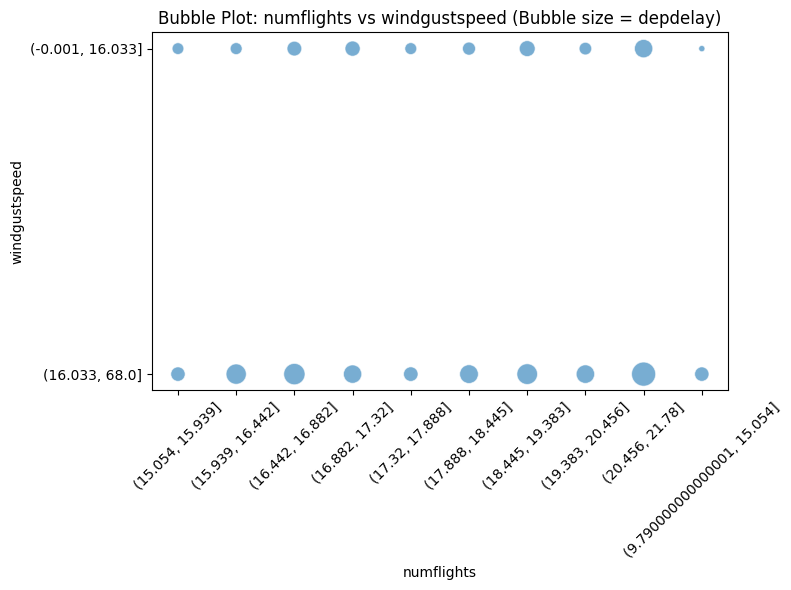

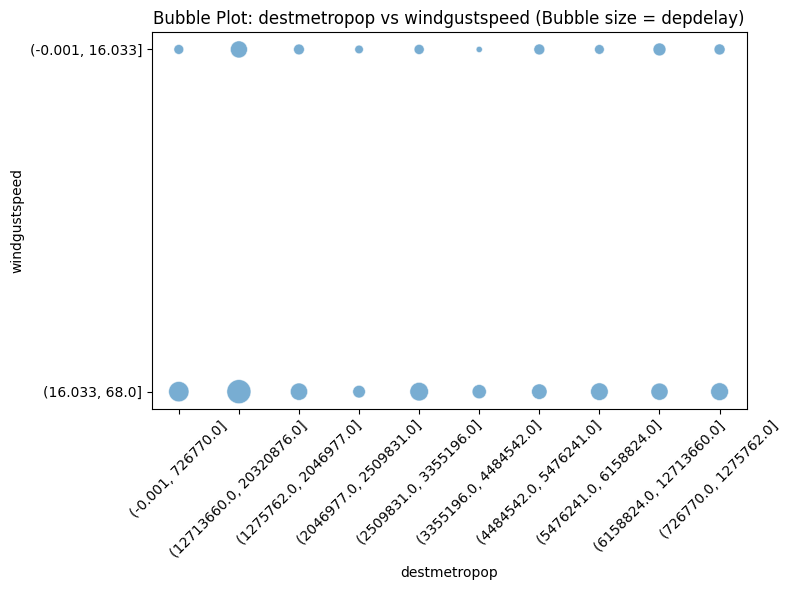

In [35]:
generate_top_binned_bubble_plots(
    df2_samp,
    target_variable="depdelay",
    bin_method="quantile",  # or "uniform"
    bins=10,
    top_n=10,
    unique_threshold=10  # adjust if needed
)


In [38]:

result = backward_selection(df2_samp, target_variable="depdelay")
print(result["selected_features"])
print(result["final_r2"])
print(result["removal_history"])


['marketshareorigin', 'marketsharedest', 'hhiorigin', 'hhidest', 'nonhubairportorigin', 'smallhubairportorigin', 'mediumhubairportorigin', 'largehubairportorigin', 'nonhubairportdest', 'smallhubairportdest', 'mediumhubairportdest', 'largehubairportdest', 'nonhubairlineorigin', 'smallhubairlineorigin', 'mediumhubairlineorigin', 'largehubairlineorigin', 'nonhubairlinedest', 'smallhubairlinedest', 'mediumhubairlinedest', 'largehubairlinedest', 'year', 'month', 'dayofmonth', 'dayofweek', 'originairportid', 'destairportid', 'capacity', 'loadfactor', 'numflights', 'distance', 'monopolyroute', 'temperature', 'temp_ninfty_n10', 'temp_n10_0', 'temp_0_10', 'temp_10_20', 'temp_20_30', 'temp_30_40', 'temp_40_infty', 'windspeed', 'windspeedsquare', 'windgustdummy', 'windgustspeed', 'raindummy', 'raintracedummy', 'snowdummy', 'snowtracedummy', 'originmetropop', 'originmetrogdppercapita', 'destmetropop', 'destmetrogdppercapita']
0.023537655333411234
[('scheduledhour', 0.023537655333411234)]


## USDOT On-Time Dataset

In [69]:
df3 = pd.read_csv("usdot_onetime_clean_no_encode.csv", low_memory=False)
#df2 = df2.drop(columns="arrdelay") # Dropping this column due to data leakage when predicting depdelay
# Generating a random sample of 100k to make the data more manageable.
df3_clean = df3.dropna(axis=1, how='all')
df3_samp = df3_clean.sample(n=100000, random_state=42)


In [70]:
df3_imp = safe_impute_numeric(df3_samp)

Number of numeric columns with missing values: 45
Number of columns with at least one non-NaN value: 40
Shape of imputed array: (100000, 40)


In [72]:
df3_imp = df3_imp.dropna(axis=1, how='all').copy()
analyze_dataset(df3_imp, "USDOT Ontime Flight Dataset")

Analyzing dataset: USDOT Ontime Flight Dataset
Explained variance ratio: [0.50010134 0.49857923 0.00114103]
Principal component vectors:
 [[ 1.46825824e-17  1.66533454e-16 -0.00000000e+00  3.00588786e-07
   3.70574998e-08 -3.14343052e-05 -1.13489965e-04  9.93979019e-03
   9.93977809e-01  5.45036948e-03 -1.45392798e-05  3.98121198e-05
   1.08984867e-03  1.08984922e-01  3.96195355e-04 -5.35153013e-06
   2.18245503e-05 -1.11032501e-04 -1.16821180e-04 -6.32573420e-06
  -5.10476990e-06 -7.47866519e-08 -3.65821452e-07 -1.74255714e-06
  -1.29187507e-04 -2.59370692e-05  9.18396674e-07 -3.58410060e-05
  -1.84170534e-05 -1.02559054e-05 -6.61695101e-06 -9.81332027e-08
  -6.17990089e-07 -1.22353140e-08 -4.58359890e-10  2.90284876e-05
   2.38546709e-05  2.46766891e-05  6.90444855e-21  3.26664286e-04
   1.35621648e-06 -4.11004370e-07 -1.14273404e-07  1.78100495e-07
   4.72795156e-09  9.77562388e-07 -1.60211890e-06 -2.26457998e-07
  -2.21245725e-07 -1.47618453e-09  2.41796652e-10 -7.25281341e-08
  -3

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_51936\849365696.py:50: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(zscore(df[numeric_cols]))


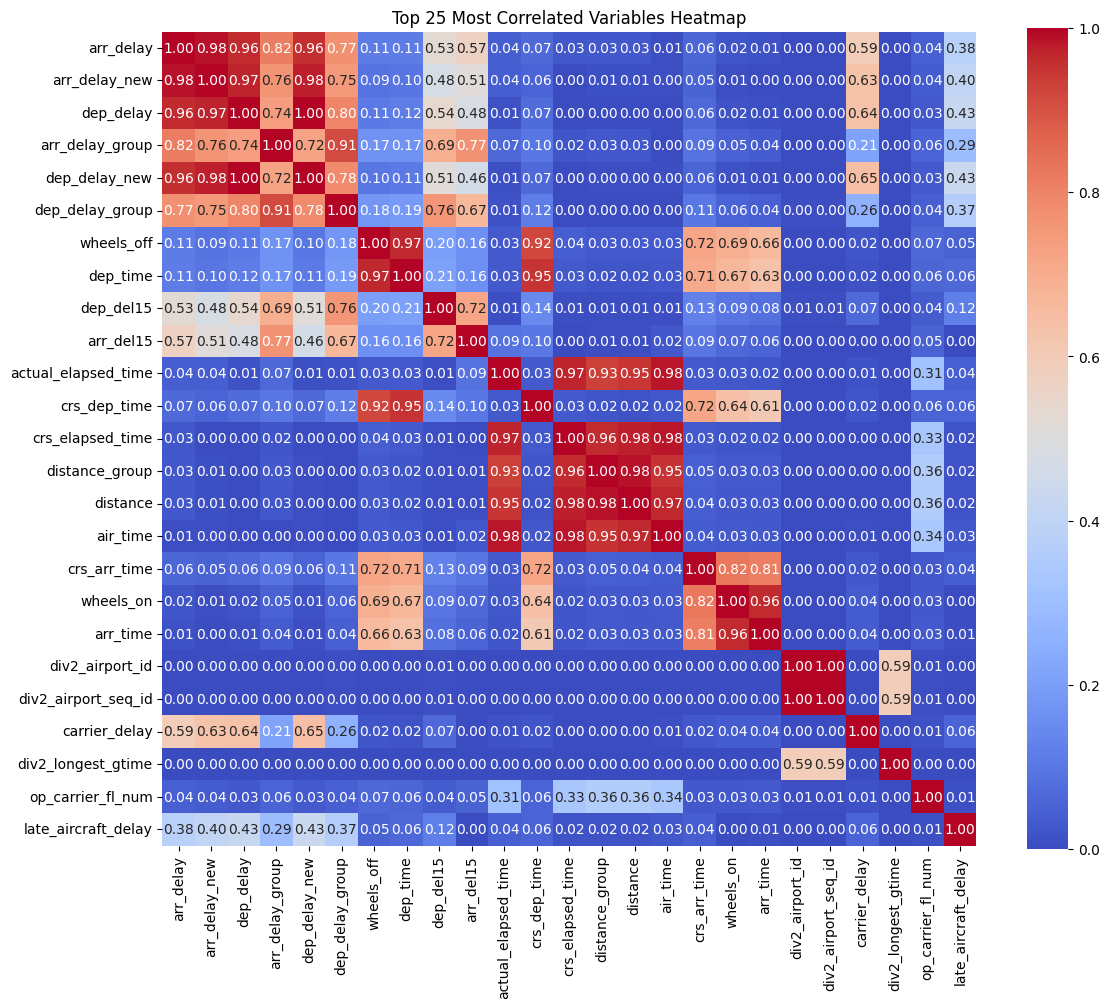

In [73]:
plot_top_correlated_heatmap(df3_imp, 25)

C:\Users\tyler.brantingham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\tyler.brantingham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


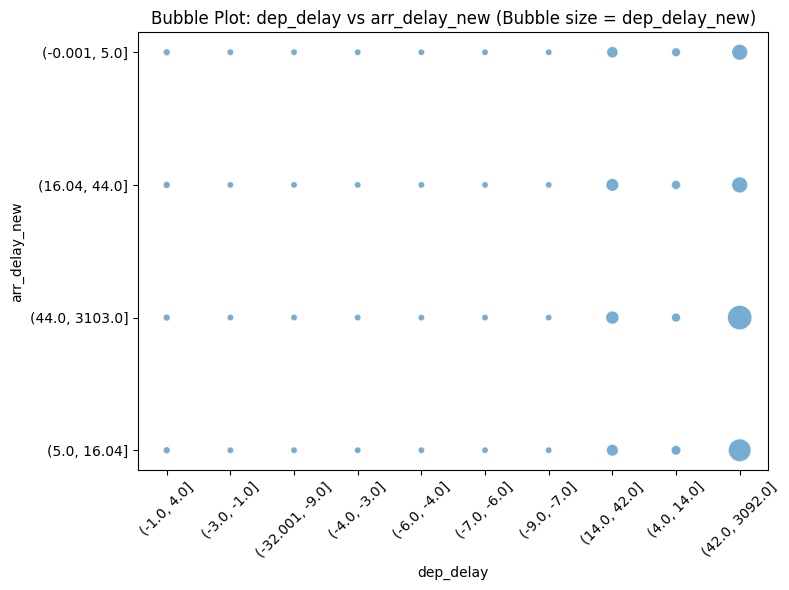

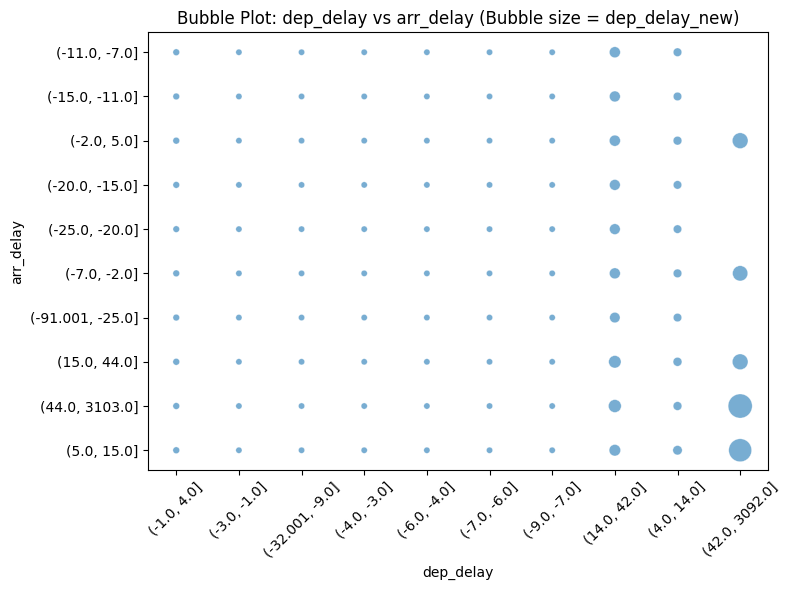

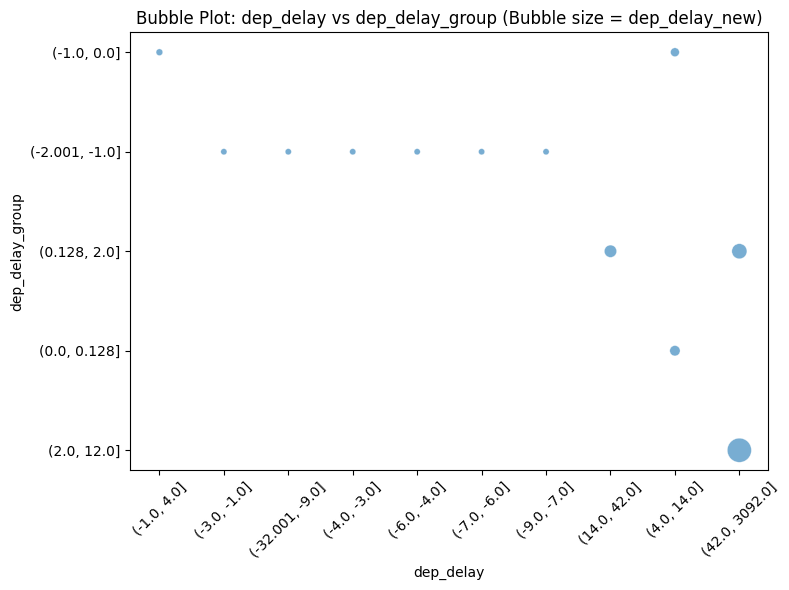

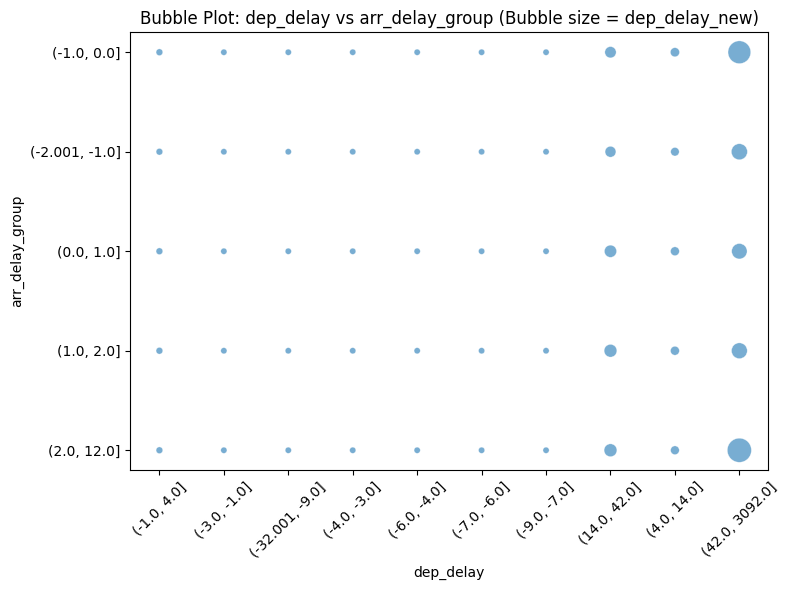

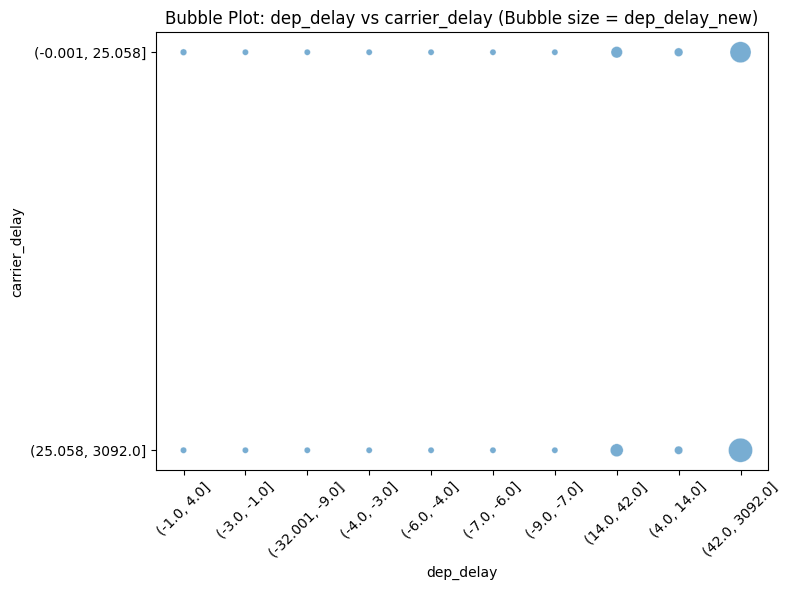

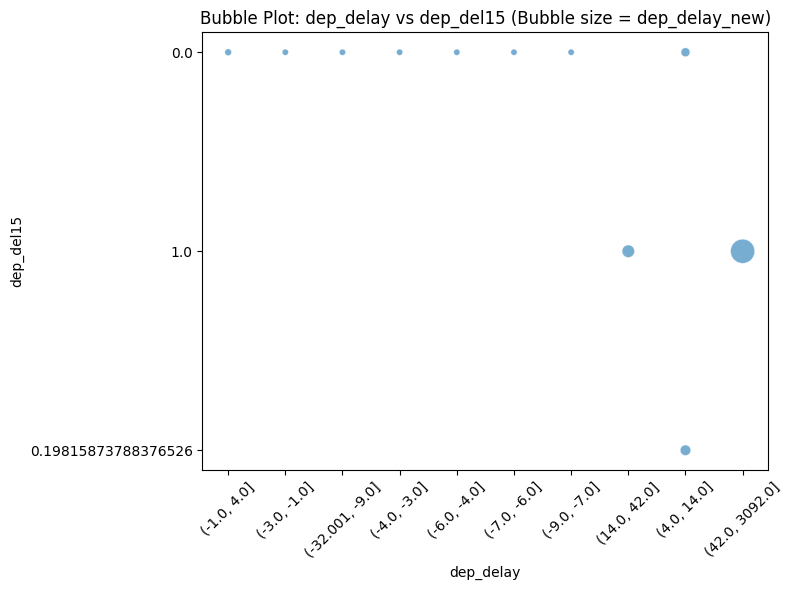

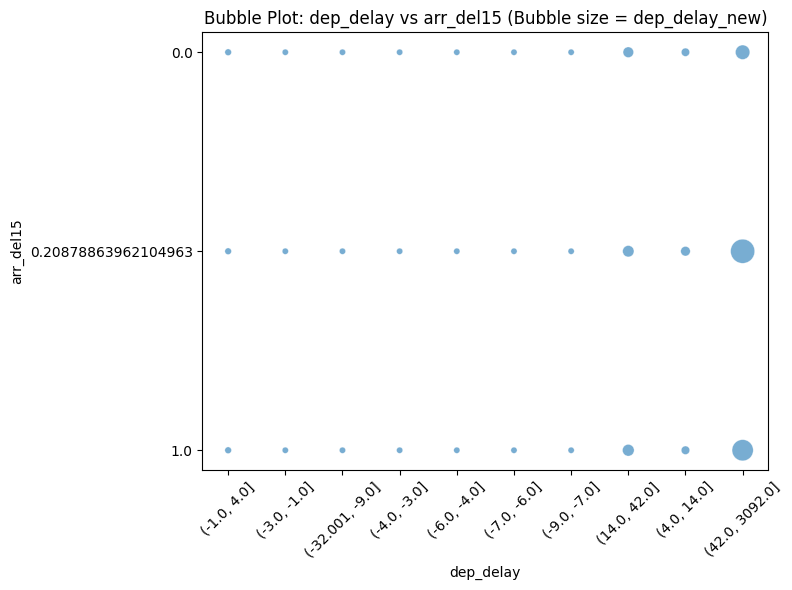

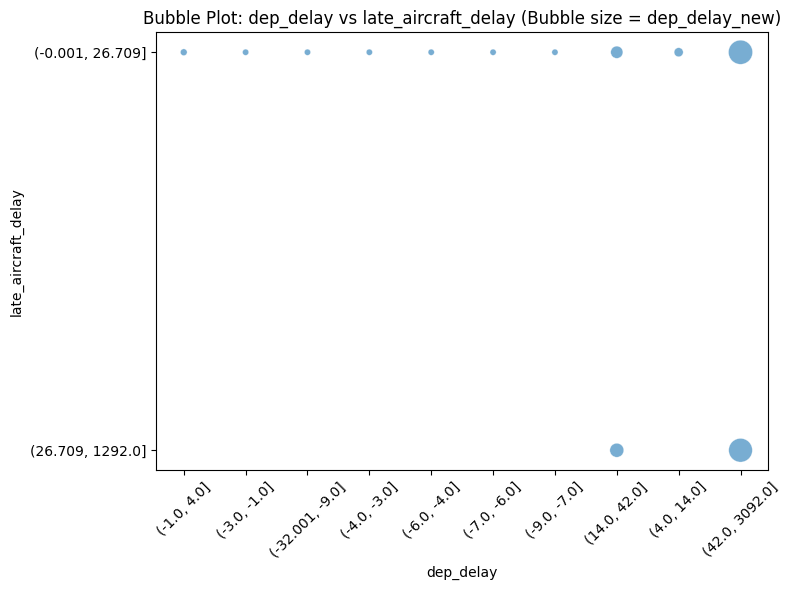

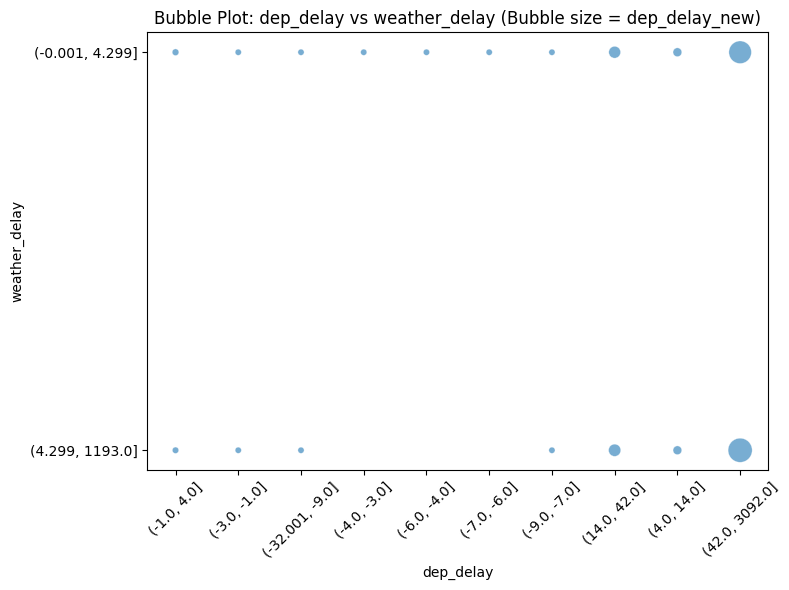

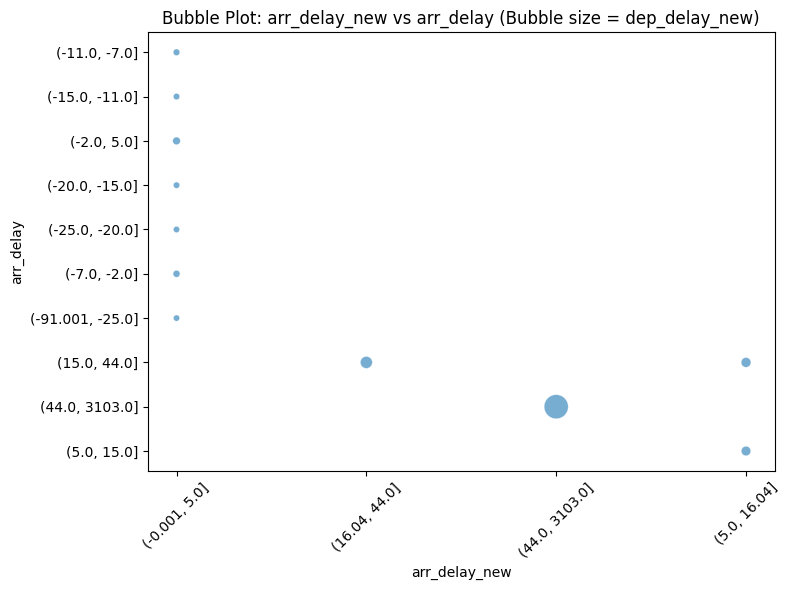

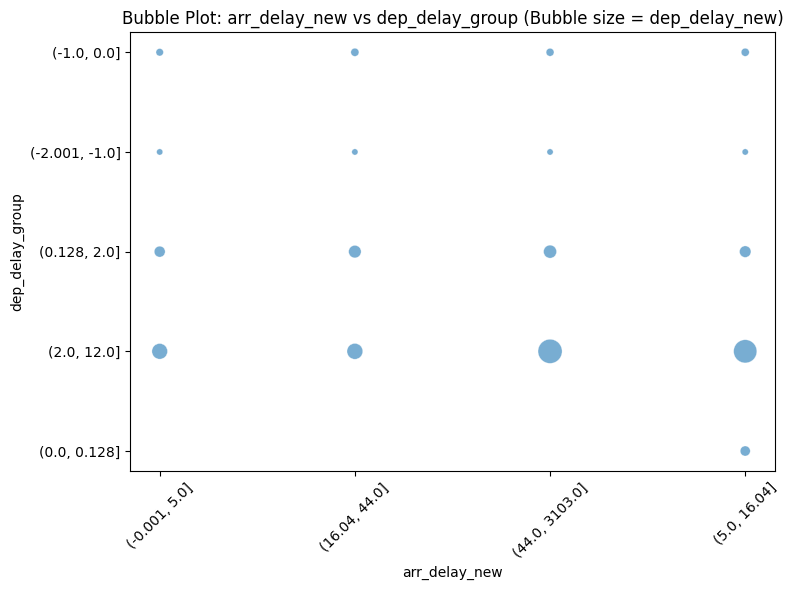

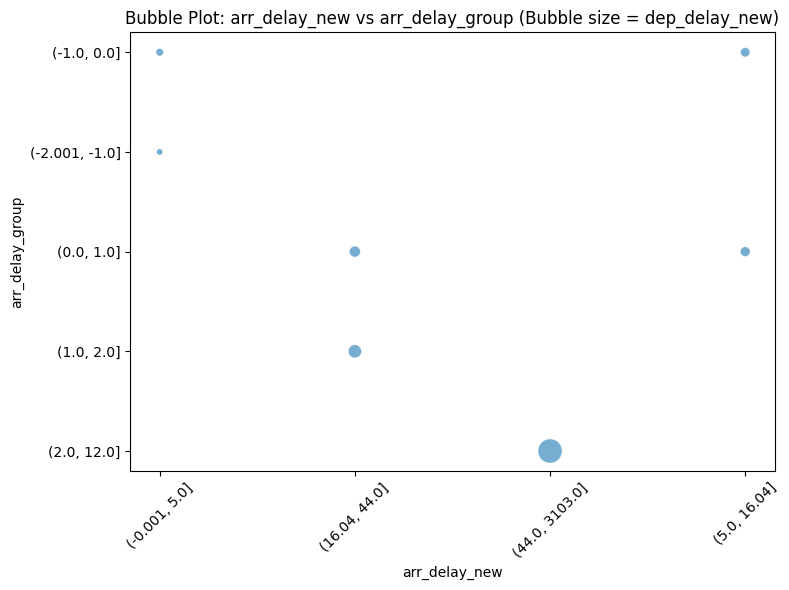

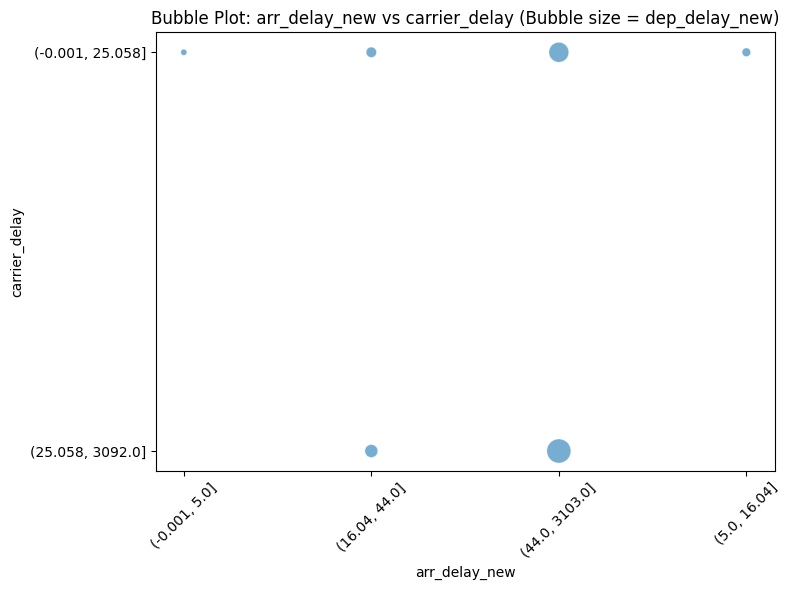

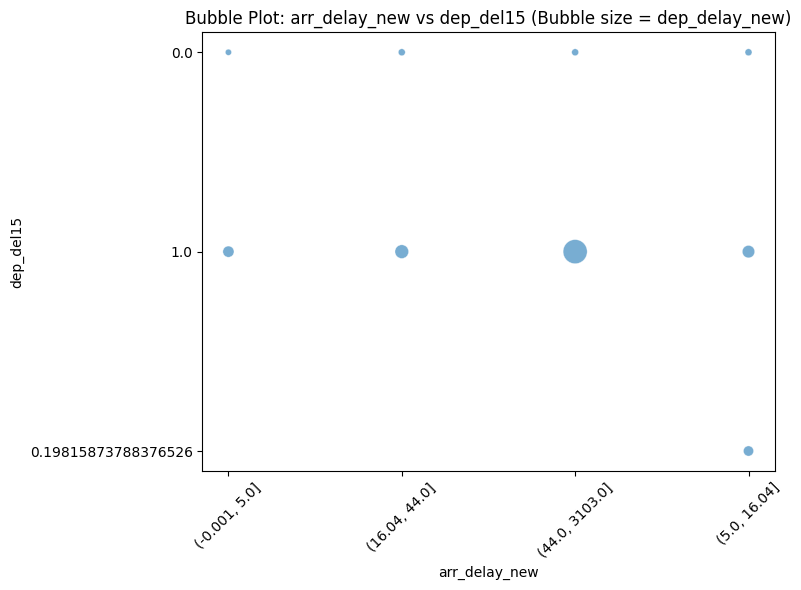

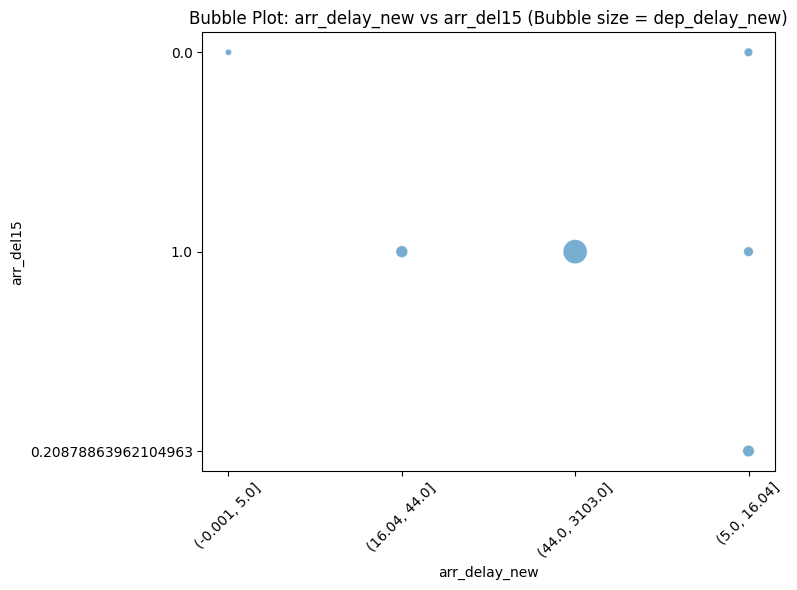

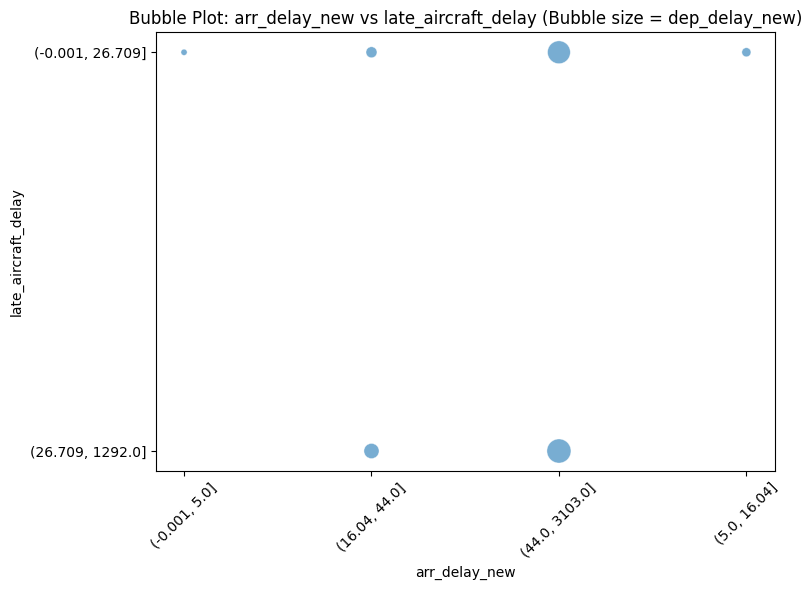

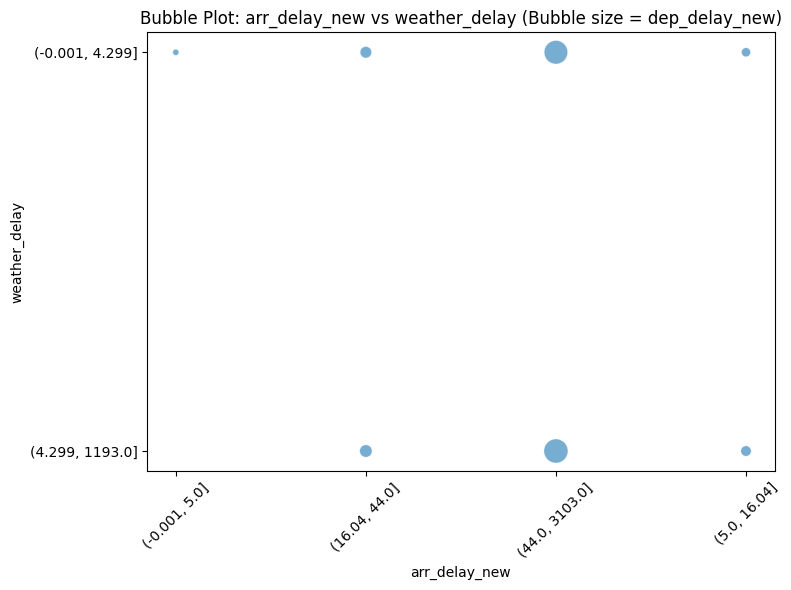

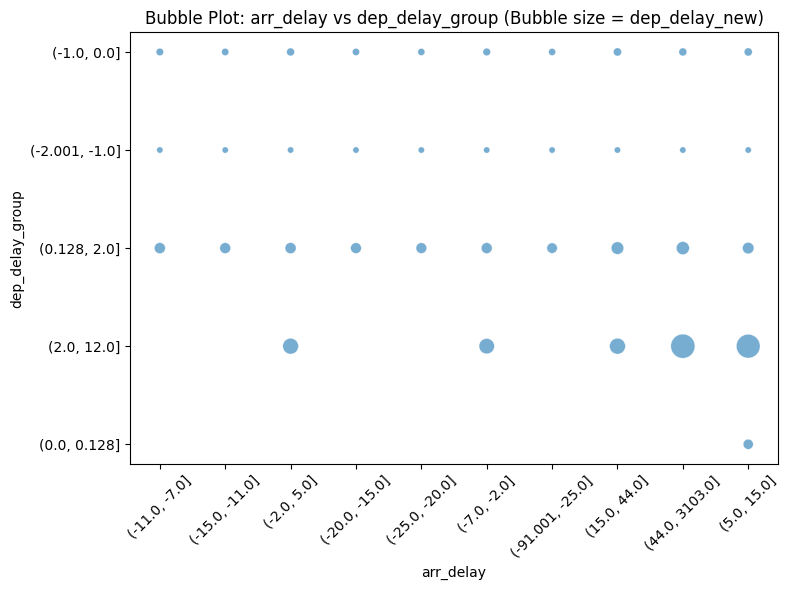

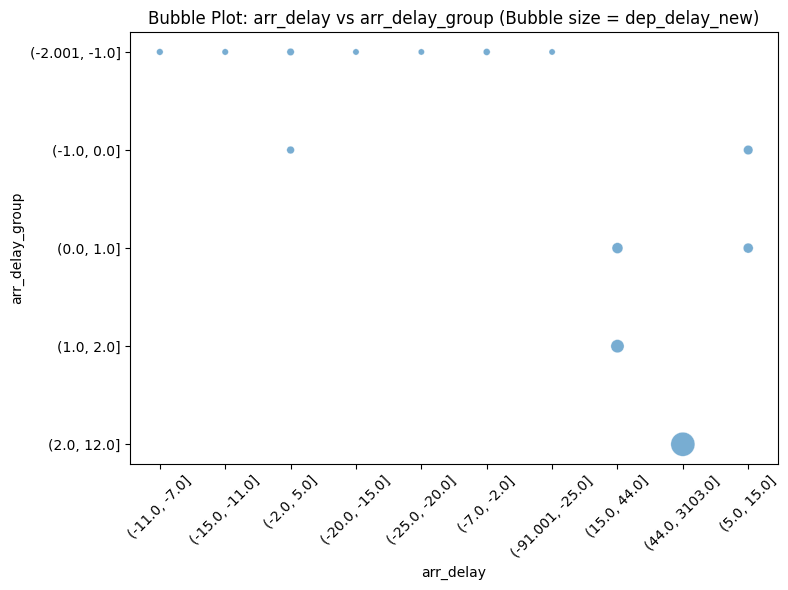

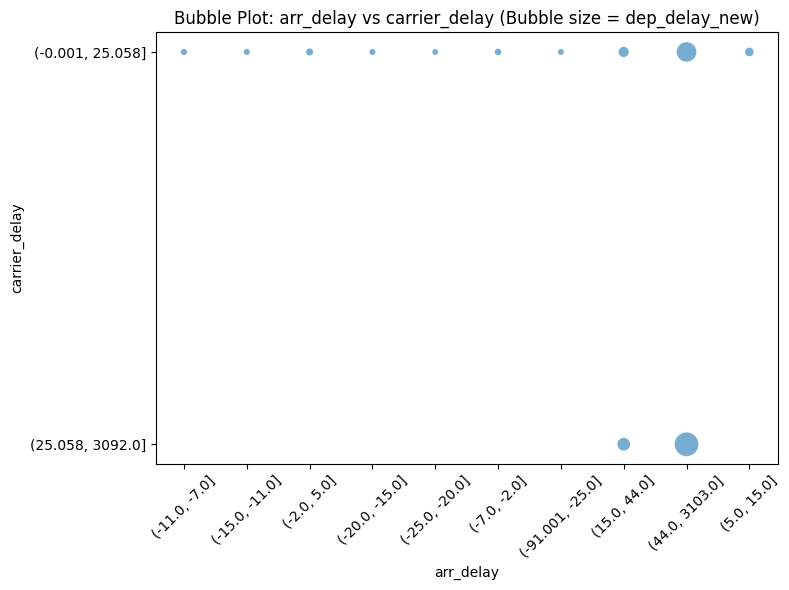

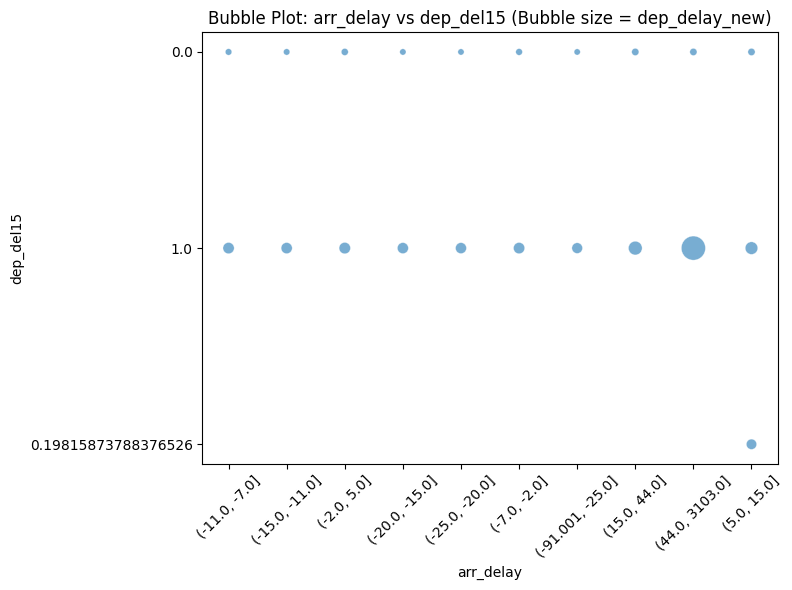

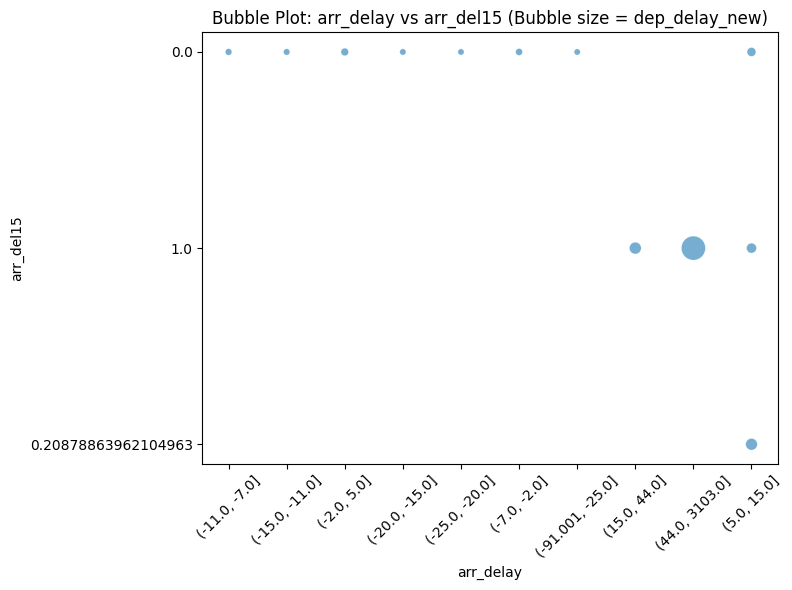

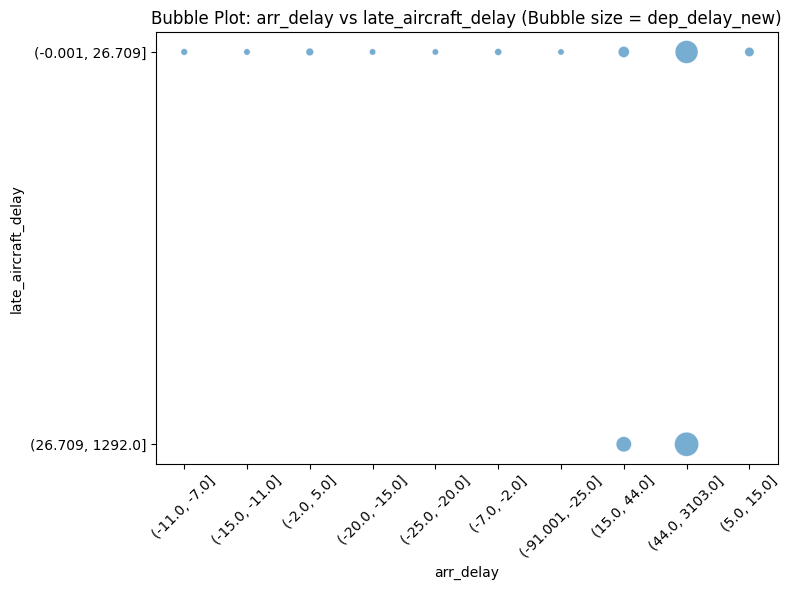

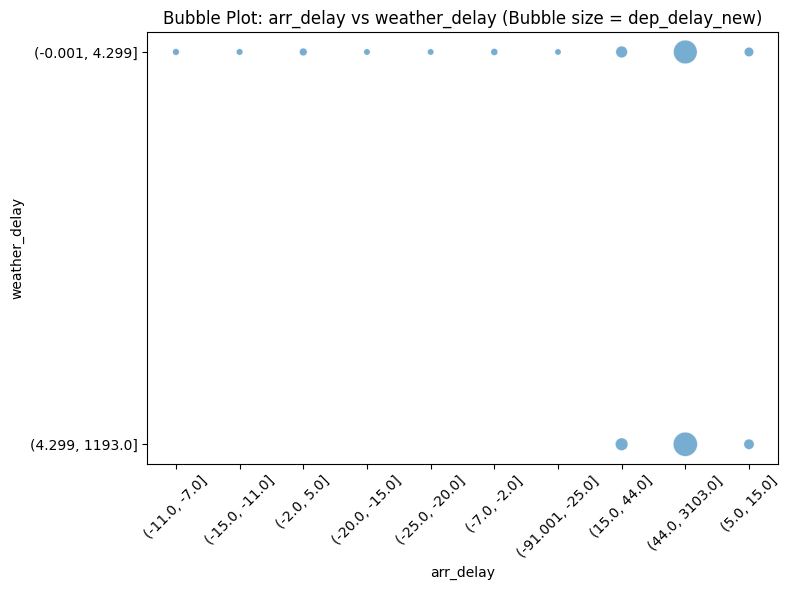

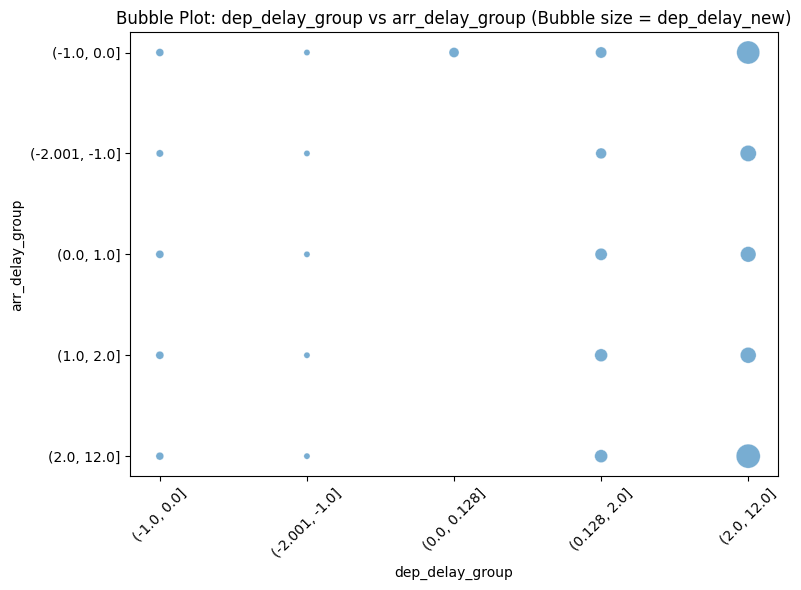

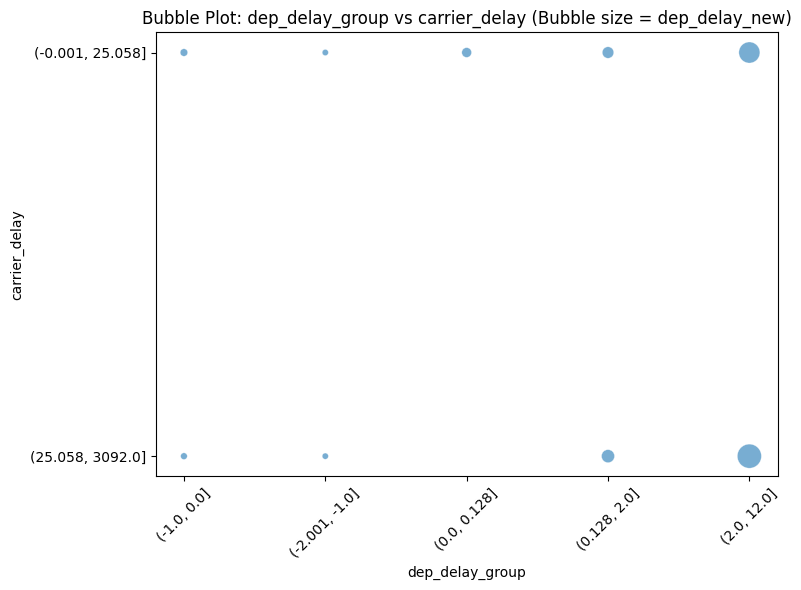

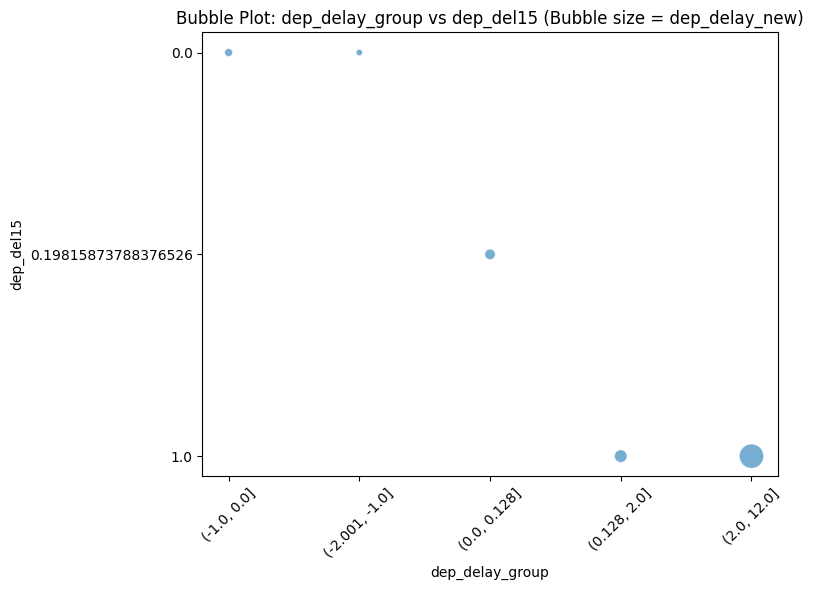

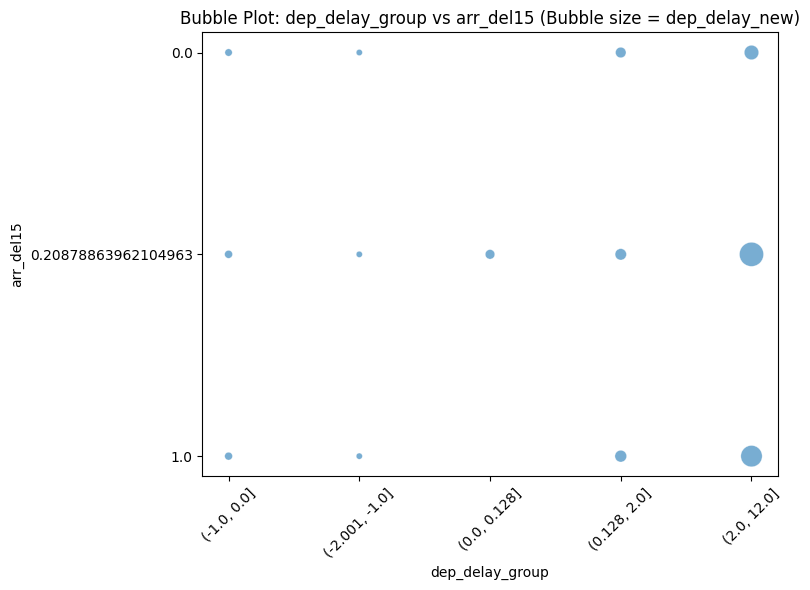

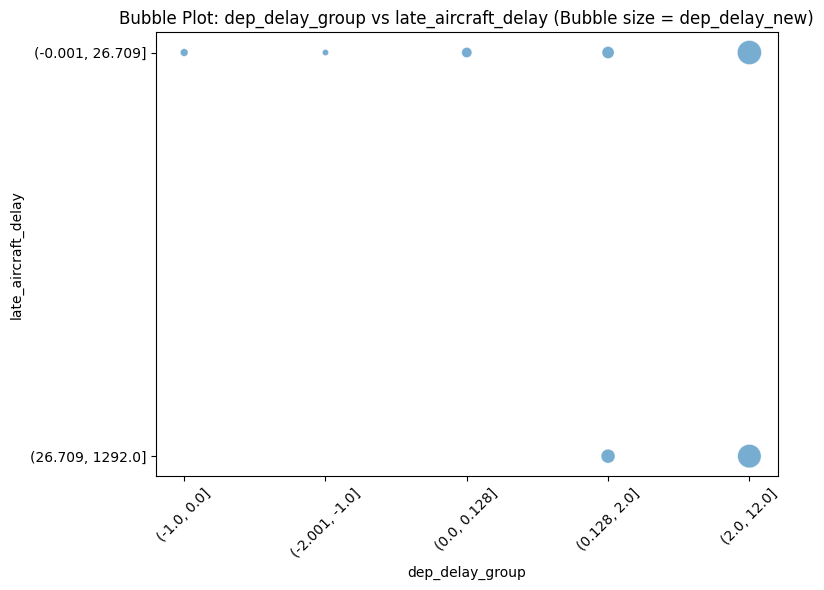

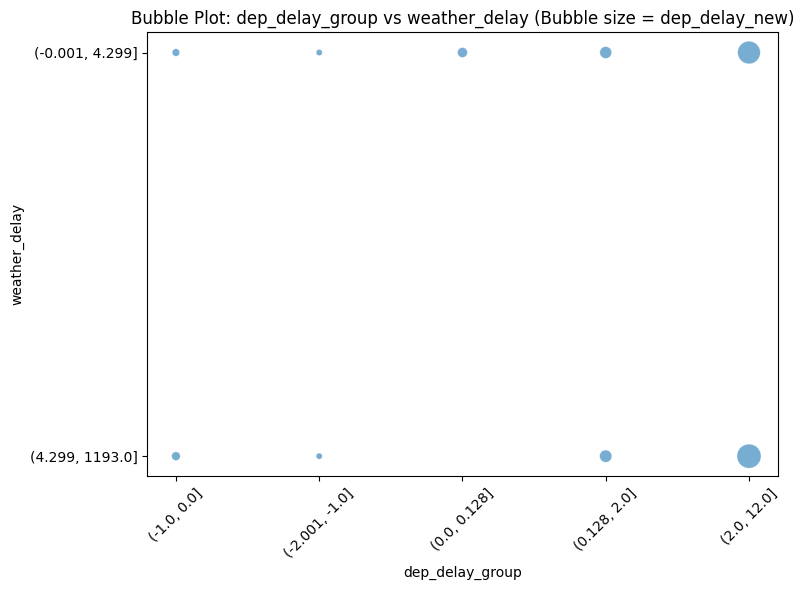

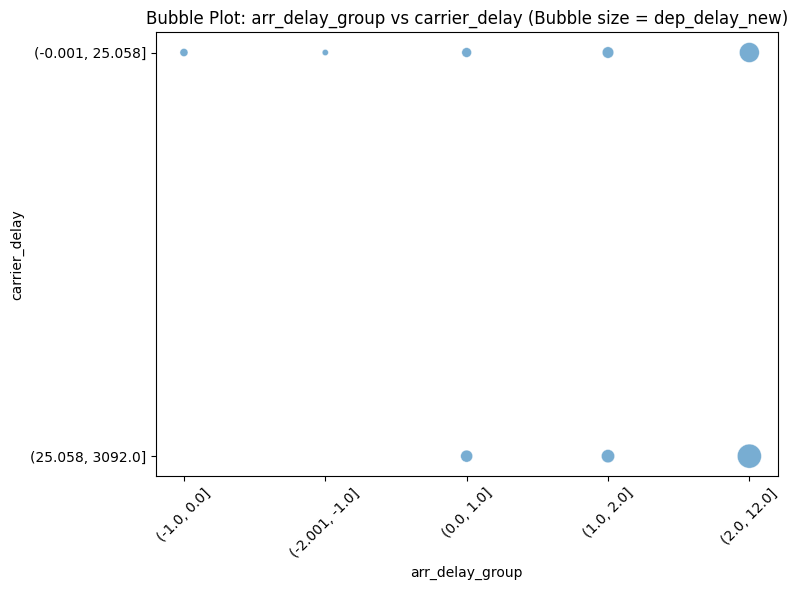

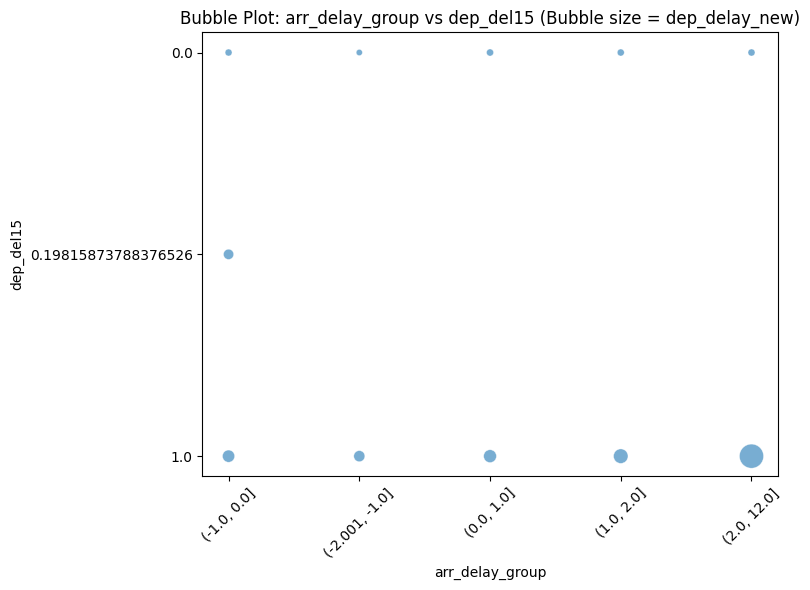

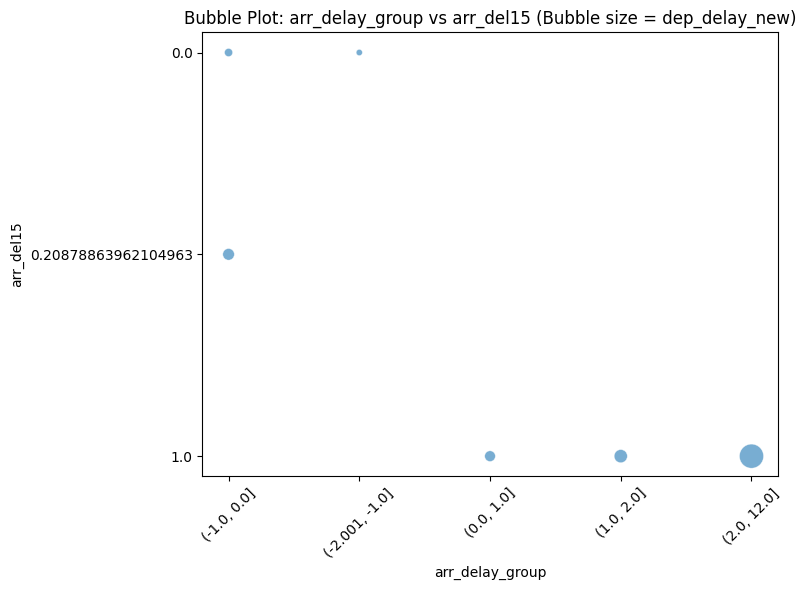

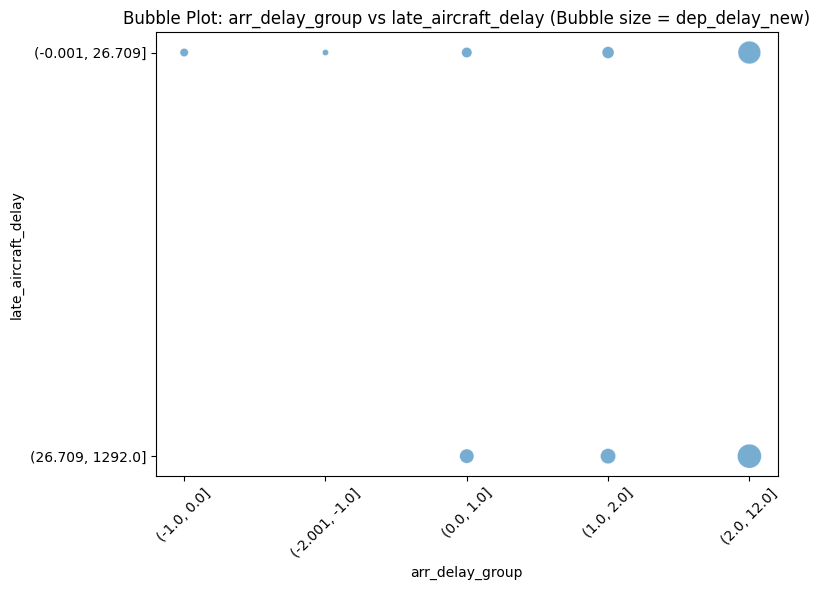

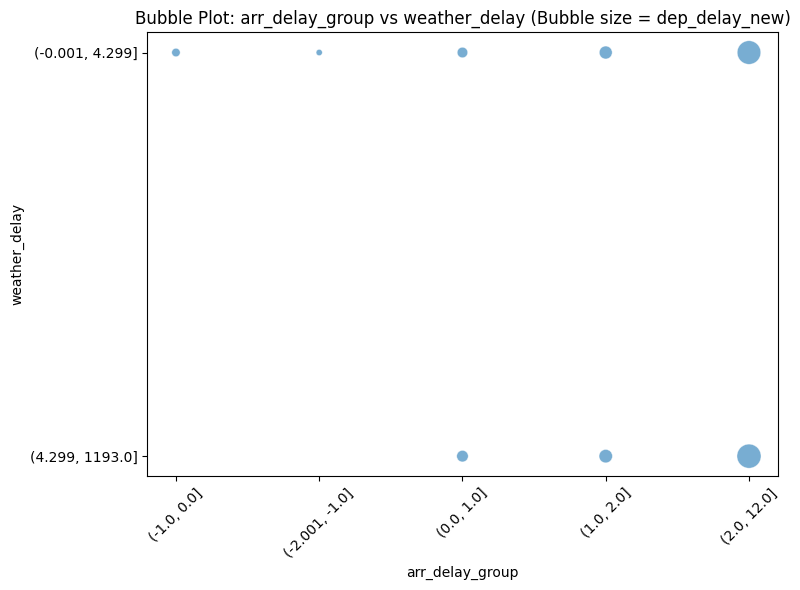

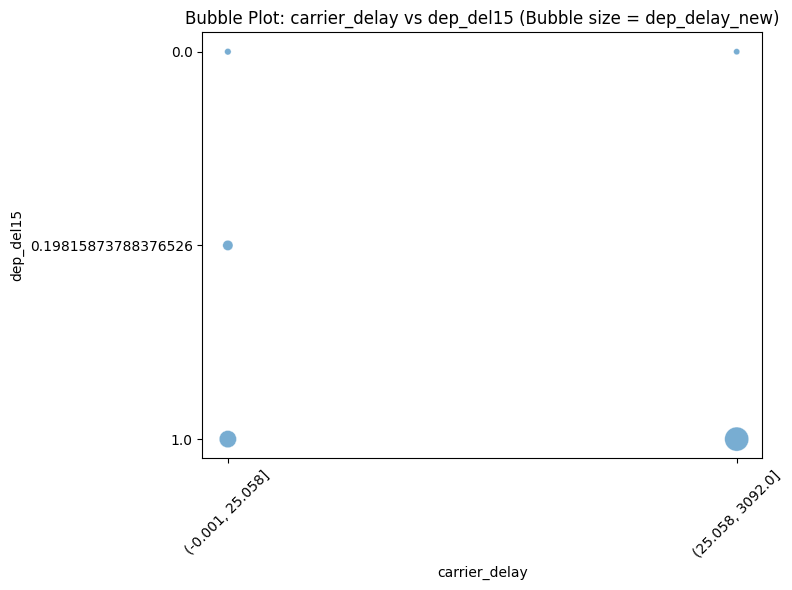

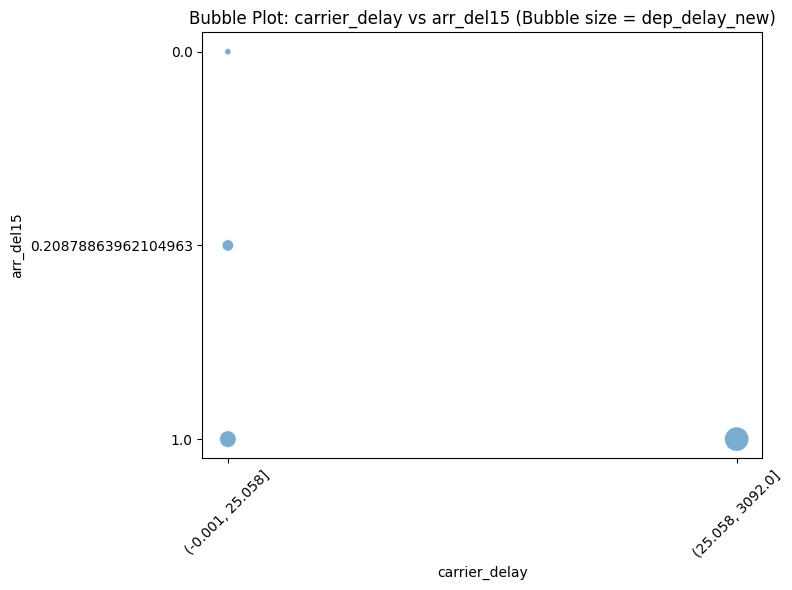

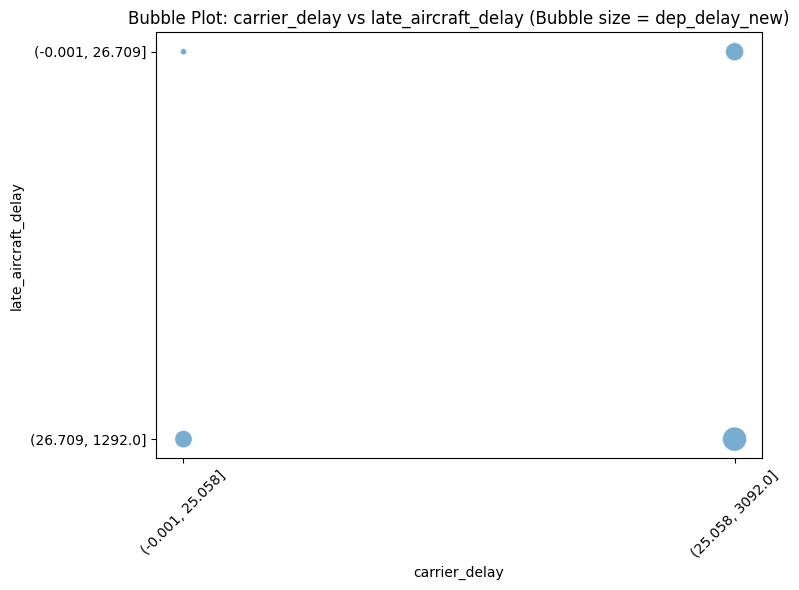

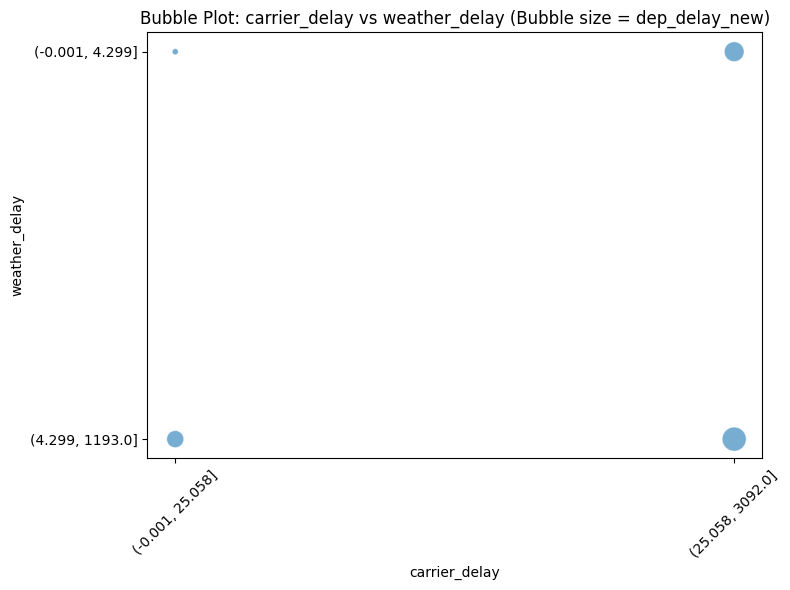

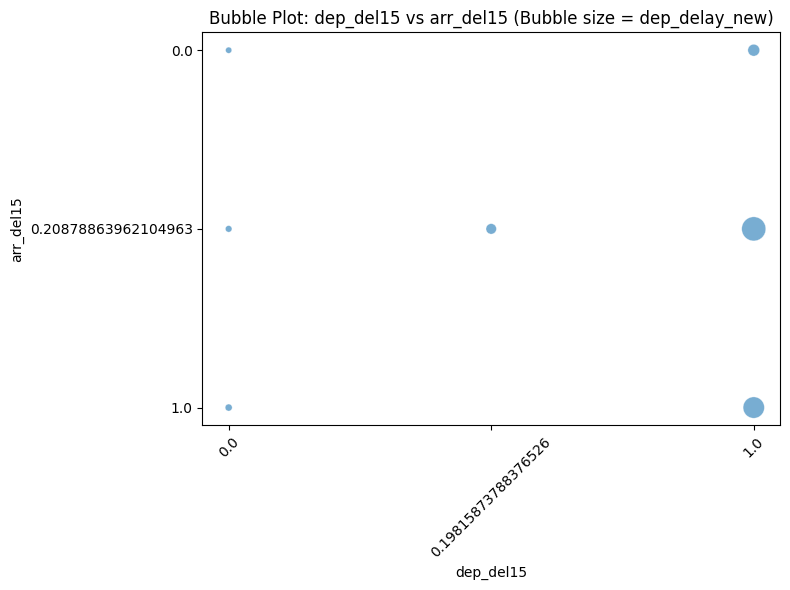

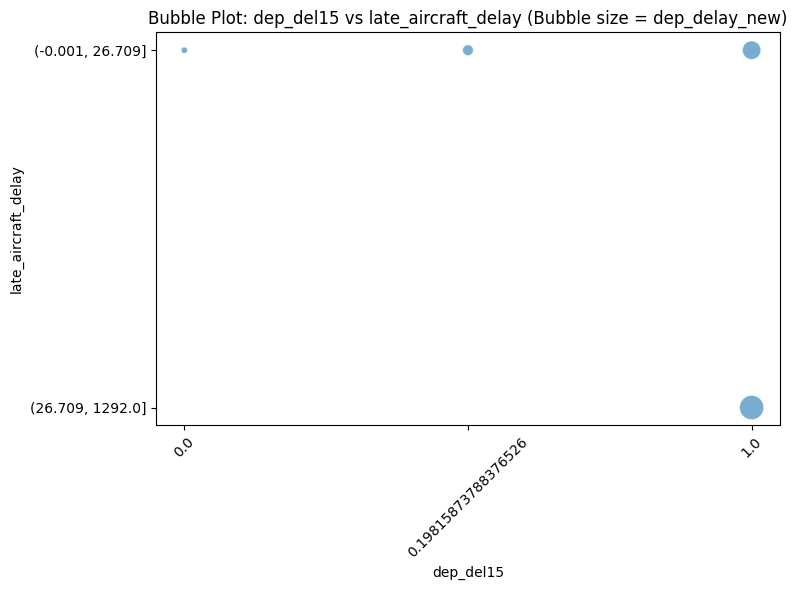

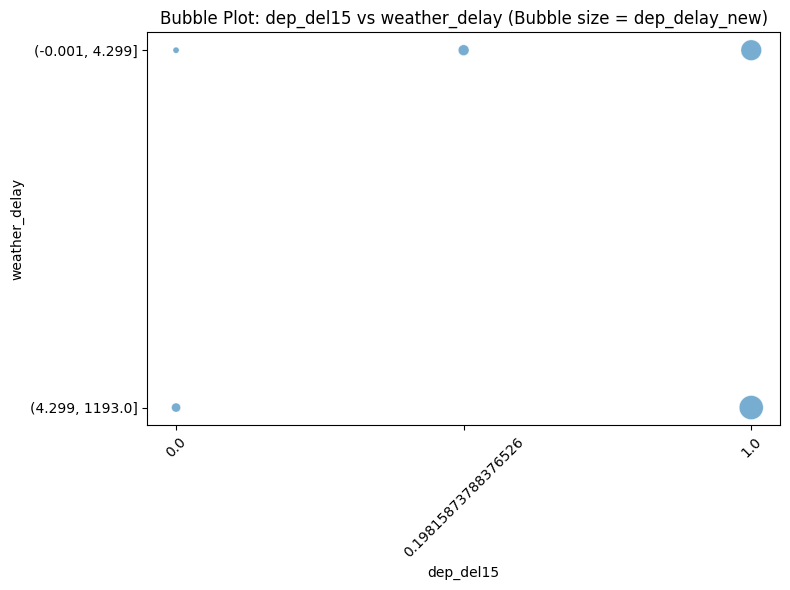

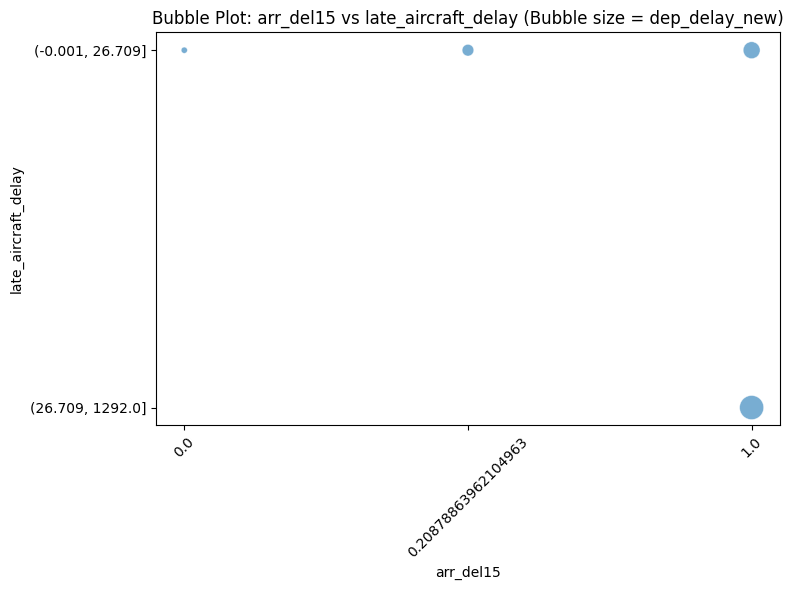

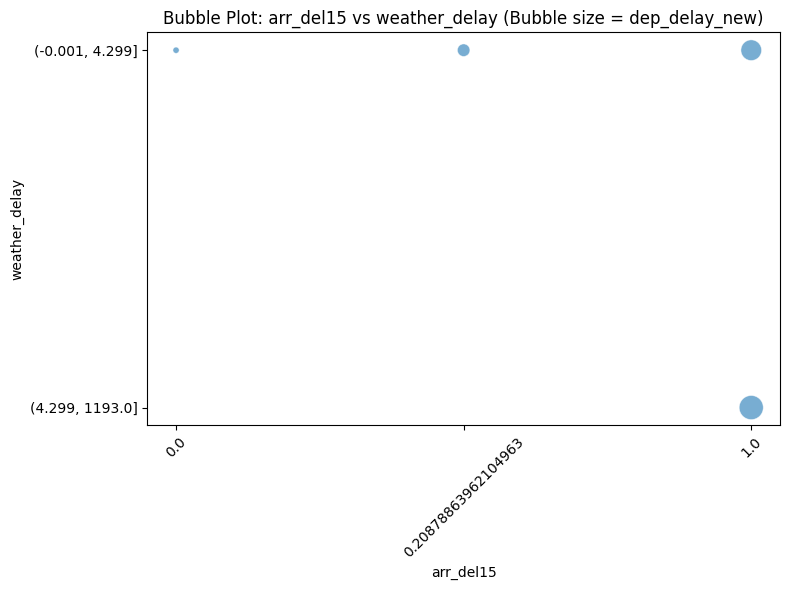

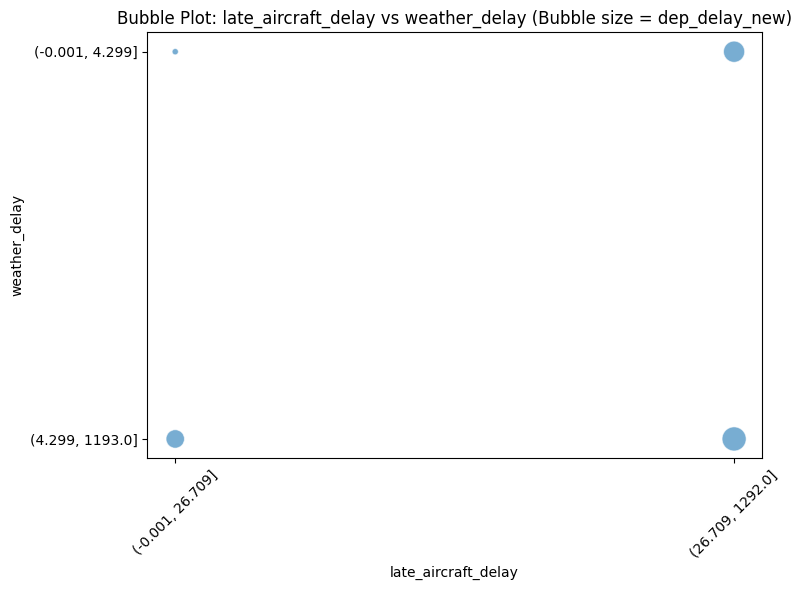

In [74]:
generate_top_binned_bubble_plots(
    df3_imp,
    target_variable="dep_delay_new",
    bin_method="quantile",  # or "uniform"
    bins=10,
    top_n=10,
    unique_threshold=10  # adjust if needed
)


In [75]:

result = backward_selection(df3_imp, target_variable="dep_delay_new")
print(result["selected_features"])
print(result["final_r2"])
print(result["removal_history"])


['year', 'quarter', 'month', 'day_of_month', 'day_of_week', 'op_carrier_airline_id', 'op_carrier_fl_num', 'origin_airport_id', 'origin_airport_seq_id', 'origin_city_market_id', 'origin_state_fips', 'origin_wac', 'dest_airport_id', 'dest_airport_seq_id', 'dest_city_market_id', 'dest_state_fips', 'dest_wac', 'crs_dep_time', 'dep_time', 'dep_del15', 'dep_delay_group', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay', 'arr_delay_new', 'arr_del15', 'arr_delay_group', 'cancelled', 'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights', 'distance', 'distance_group', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'first_dep_time', 'total_add_gtime', 'longest_add_gtime', 'div_airport_landings', 'div_reached_dest', 'div_actual_elapsed_time', 'div_arr_delay', 'div_distance', 'div1_airport_id', 'div1_airport_seq_id', 'div1_wheels_on', 'div1_total_gtime', 'div1_longest_gtime', 'div1_wheels_off', 